In [3]:
library(tidyverse)
library(lubridate)
library(lmerTest)
library(corrplot)
library(car)
options(contrasts = c("contr.sum","contr.poly"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Warning message:
“package ‘lmerTest’ was built under R version 3.6.3”Loading required package: lme4
Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step

corrplot 0.84 loaded
Loading required package: carData
Registered S3 methods overwritten by 'car':
  method          

Weather features were engineered in an accompanying notebook titled.....

In [33]:
rs_palette <- c("gray", "#1b9e77", "#7570b3", "#e6ab02")
p_palette <- c('orchid1', 'purple1', 'darkorchid4')
i_palette <- c('grey', 'lightblue', 'darkblue')
t_palette <- c('darkgreen', 'mediumpurple4')
b_palette <- c('#ffd4a3', '#ffaa5e', '#d08159')
y_palette <- c('dodgerblue4', 'springgreen1', '#cc77ff')
r_palette <- viridisLite::viridis(9)

## Load Gene Expression Data

In [34]:
load('1719_VSD_counts_varFilt.Rdata')
ls()

[1] "aa"                      "b_palette"              
 [3] "bb"                      "cc"                     
 [5] "d1"                      "d2"                     
 [7] "days_of_sampling"        "dd"                     
 [9] "ee"                      "env_features"           
[11] "ff"                      "fit_to_env"             
[13] "full_env_rootstock"      "i_palette"              
[15] "meta"                    "p_palette"              
[17] "pc"                      "pca"                    
[19] "pcax"                    "pcax_means"             
[21] "PCs_to_enrich"           "plot_effSizes"          
[23] "plot_term"               "r_palette"              
[25] "rs_palette"              "s1"                     
[27] "s2"                      "t_palette"              
[29] "vsd_counts_varFilt"      "vsd_counts_varFilt_meta"
[31] "y_palette"

In [35]:
dim(vsd_counts_varFilt)

[1]  1178 24392

## Perhaps, this will be more digestible with a PCA approach

In [36]:
meta <- read.csv('1719_treatments.csv')
meta$Year <- factor(meta$Year)
rownames(meta) <- meta$X
meta$X <- NULL
head(meta)

sampleName Year Tissue Phenology indexer                  Rootstock
A1Y1_001_L A1Y1_001_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_A_2 1103P    
A1Y1_002_L A1Y1_002_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_A_3 1103P    
A1Y1_003_L A1Y1_003_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_B_2 3309C    
A1Y1_004_L A1Y1_004_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_B_2 3309C    
A1Y1_005_L A1Y1_005_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_C_2 SO4      
A1Y1_006_L A1Y1_006_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_C_3 SO4      
           Irrigation Row Block
A1Y1_001_L None       8   A    
A1Y1_002_L None       8   A    
A1Y1_003_L None       8   A    
A1Y1_004_L None       8   A    
A1Y1_005_L None       8   A    
A1Y1_006_L None       8   A

In [37]:
vsd_counts_varFilt_meta <- merge(vsd_counts_varFilt, meta, by=0)
dim(vsd_counts_varFilt_meta)

[1]  1178 24402

In [38]:
pca <- vsd_counts_varFilt_meta %>% 
  ungroup() %>% 
  select(Vitvi00g00444:Vitvi19g02388) %>%
  prcomp(., center=T, scale=T)

pcax <- as.data.frame(pca$x)
pcax$Tissue <- vsd_counts_varFilt_meta$Tissue
pcax$Rootstock <- vsd_counts_varFilt_meta$Rootstock
pcax$Year <- vsd_counts_varFilt_meta$Year
pcax$Phenology <- vsd_counts_varFilt_meta$Phenology
pcax$Block <- vsd_counts_varFilt_meta$Block

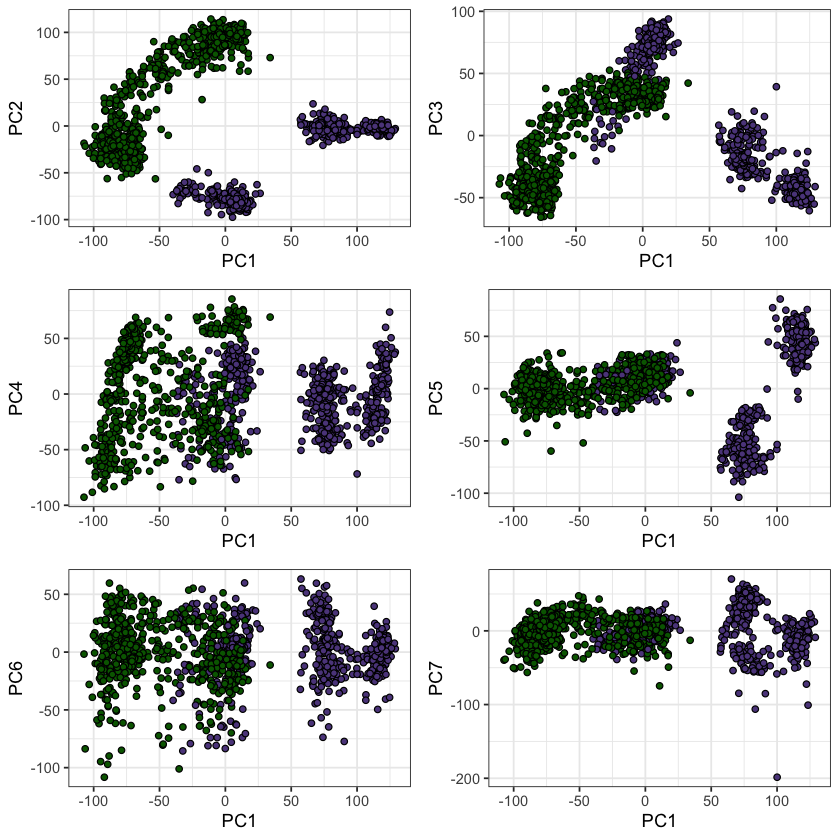

In [39]:
aa <- ggplot(pcax, aes(PC1, PC2, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

bb <- ggplot(pcax, aes(PC1, PC3, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

cc <- ggplot(pcax, aes(PC1, PC4, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

dd <- ggplot(pcax, aes(PC1, PC5, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

ee <- ggplot(pcax, aes(PC1, PC6, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

ff <- ggplot(pcax, aes(PC1, PC7, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

ggpubr::ggarrange(aa, bb, cc, dd, ee, ff,
                  nrow=3, ncol=2, legend=F)

In [168]:
rownames(pca$rotation)[1:10]

[1] "Vitvi00g00444" "Vitvi00g00447" "Vitvi00g00547" "Vitvi00g00610"
 [5] "Vitvi00g00612" "Vitvi00g00614" "Vitvi00g00615" "Vitvi00g00616"
 [9] "Vitvi00g00667" "Vitvi00g00668"

In [40]:
## write the top/bottom loading PCs to files

count_genes <- function(PC, pca){
    test.pc <- pca$rotation[,PC]
    m <- mean(test.pc)
    s <- sd(test.pc)
    
    high <- test.pc > m + 1.96*s
    low <- test.pc < m - 1.96*s

    high_genes <- rownames(pca$rotation)[high]
    low_genes <- rownames(pca$rotation)[low]
    
    write.csv(high_genes, str_interp('genePC_loaders/${PC}_high_loaders.csv'))
    write.csv(low_genes, str_interp('genePC_loaders/${PC}_low_loaders.csv'))
}

tmp <- lapply(X=paste('PC', 1:288, sep=''), FUN=count_genes, pca=pca)

In [41]:
## compute PC means for each rootstock x block combo in each timepoint
pcax_means <- pcax %>%
  group_by(Tissue, Rootstock, Block, Year, Phenology) %>%
  summarize_at(vars(PC1:PC288), ~mean(.x))

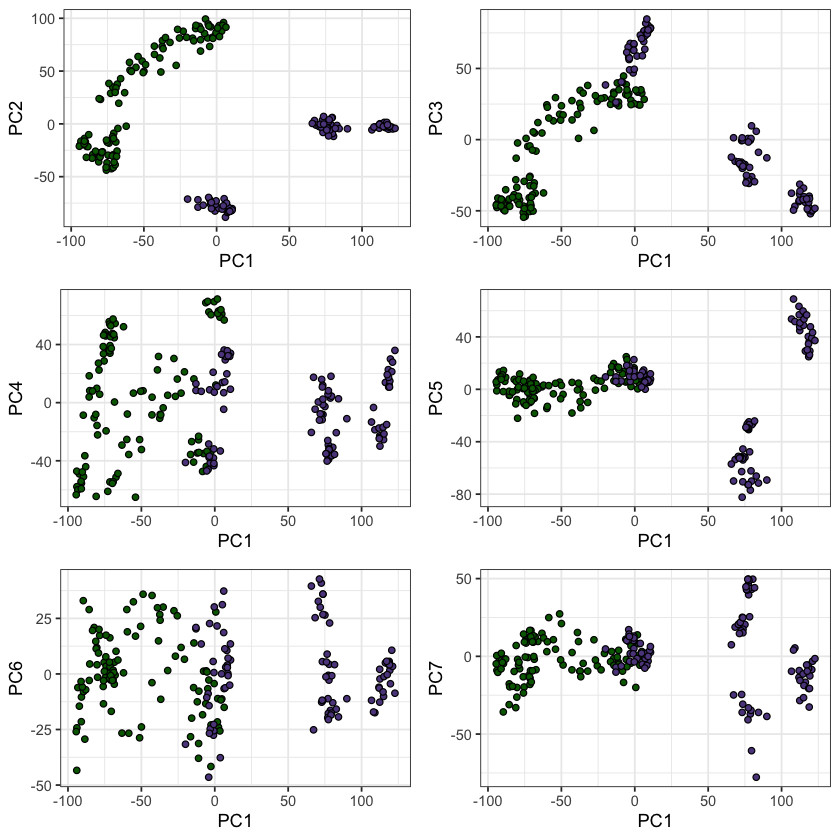

In [42]:
aa <- ggplot(pcax_means, aes(PC1, PC2, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

bb <- ggplot(pcax_means, aes(PC1, PC3, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

cc <- ggplot(pcax_means, aes(PC1, PC4, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

dd <- ggplot(pcax_means, aes(PC1, PC5, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

ee <- ggplot(pcax_means, aes(PC1, PC6, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

ff <- ggplot(pcax_means, aes(PC1, PC7, fill=Tissue)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=t_palette) + 
  theme_bw()

ggpubr::ggarrange(aa, bb, cc, dd, ee, ff,
                  nrow=3, ncol=2, legend=F)

## Is there a rootstock signal in the top PCs?

In [43]:
find_rootstock <- function(pc, full_df){
    tmp <- data.frame(pc=pc, tissue=full_df$Tissue, rootstock=full_df$Rootstock)
    lmod <- lm(pc ~ tissue*rootstock, data=tmp)
    aov <- car::Anova(lmod, type=3)
    SS <- aov$Sum[2:5]
    SS_term <- SS / sum(SS)
    return(SS_term)
}

In [44]:
PVEs <- pcax_means %>% 
  ungroup() %>% 
  select(PC1:PC288) %>%
  apply(FUN=find_rootstock, MARGIN=2, full_df=pcax_means) %>%
  as.data.frame() %>% 
  t() %>%
  as.data.frame()

colnames(PVEs) <- c('T', 'R', 'TR', 'Res')

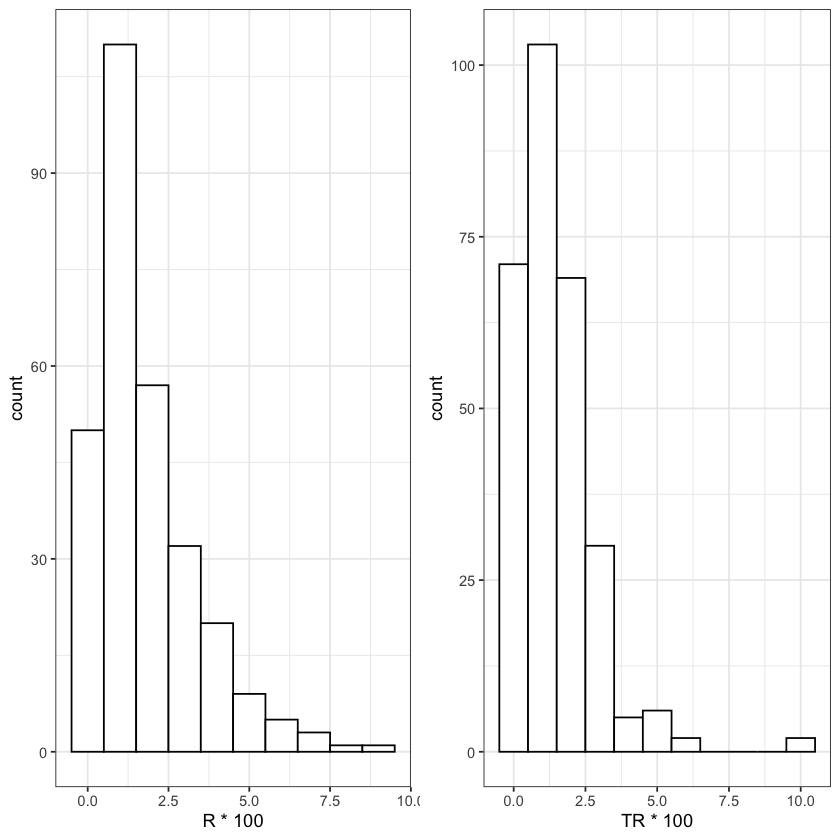

In [45]:
aa <- ggplot(PVEs, aes(x=R * 100)) +
  geom_histogram(color='black', fill='white', binwidth=1) + 
  theme_bw()

bb <- ggplot(PVEs, aes(x=TR * 100)) +
  geom_histogram(color='black', fill='white', binwidth=1) + 
  theme_bw()

ggpubr::ggarrange(aa, bb, ncol=2)

## Fit actual models

In [46]:
days_of_sampling <- c('2017-05-22', '2017-07-30', '2017-09-25', 
                      '2018-05-30', '2018-08-01', '2018-09-17', 
                      '2019-05-23', '2019-08-05', '2019-09-17')

In [47]:
pcax_means$Date <- paste(pcax_means$Year, pcax_means$Phenology, sep='_')
pcax_means$Date <- factor(pcax_means$Date, levels=c('2017_Anthesis', '2017_Veraison', '2017_Harvest', 
                                                    '2018_Anthesis', '2018_Veraison', '2018_Harvest', 
                                                    '2019_Anthesis', '2019_Veraison', '2019_Harvest'),
                    labels=c(days_of_sampling))

pcax_means$Rootstock <- factor(pcax_means$Rootstock, levels=c('Ungrafted', '1103P', '3309C', 'SO4'))


In [48]:
env_features <- read.csv('1719_weather_constructedFeatures_fullDataPCA.csv')
colnames(env_features) <- c('X', paste('ePC', 1:26, sep=''), 'Date', 'MonthDay')
pcax_means <- merge(pcax_means, env_features, by='Date')

In [49]:
full_env_rootstock <- function(pc, full_df, env='ePC1'){
    tmp <- data.frame(pc=pc, tissue=full_df$Tissue, rootstock=full_df$Rootstock, env=full_df[,env])
    lmod <- lm(pc ~ tissue*rootstock*env, data=tmp)
    aov <- car::Anova(lmod, type=3)
    SS <- aov$Sum[2:9]
    SS_term <- SS / sum(SS)
    return(SS_term)
}

plot_effSizes <- function(PVEs){
    aa <- PVEs %>%
            filter (T > 0.01) %>%
            ggplot(., aes(x=T)) +
              geom_histogram(color='black', fill='white', binwidth=0.02) + 
              theme_bw()

    bb <- PVEs %>%
            filter (R > 0.01) %>%
            ggplot(., aes(x=R)) +
              geom_histogram(color='black', fill='white', binwidth=0.01) + 
              theme_bw()

    cc <- PVEs %>%
            filter (E > 0.01) %>%
            ggplot(., aes(x=E)) +
              geom_histogram(color='black', fill='white', binwidth=0.02) + 
              theme_bw()

    dd <- PVEs %>%
            filter (TR > 0.01) %>%
            ggplot(., aes(x=TR)) +
              geom_histogram(color='black', fill='white', binwidth=0.01) + 
              theme_bw()

    ee <- PVEs %>%
            filter (TE > 0.01) %>%
            ggplot(., aes(x=TE)) +
              geom_histogram(color='black', fill='white', binwidth=0.02) + 
              theme_bw()

    ff <- PVEs %>%
            filter (RE > 0.01) %>%
            ggplot(., aes(x=RE)) +
              geom_histogram(color='black', fill='white', binwidth=0.01) + 
              theme_bw()

    gg <- PVEs %>%
            filter (TRE > 0.01) %>%
            ggplot(., aes(x=TRE)) +
              geom_histogram(color='black', fill='white', binwidth=0.01) + 
              theme_bw()

    p <- ggpubr::ggarrange(aa, bb, cc,
                           dd, ee, ff, 
                           gg,
                           nrow=3,
                           ncol=3)
    
    return(p)
}

plot_term <- function(gene_PC, environment_PC, term, data){    
    if (term == 'E'){
        p <- ggplot(data, aes_string(x=environment_PC, y=gene_PC)) + 
          geom_point(size=3, shape=21, fill='grey60', stroke=1.1) +
          stat_smooth(method='lm', color='black') + 
          theme_bw()
    }
    
    if (term == 'TE'){
        p <- ggplot(data, aes_string(x=environment_PC, y=gene_PC, fill='Tissue')) + 
          geom_point(size=3, shape=21, stroke=1.1) +
          stat_smooth(method='lm', color='black') + 
          scale_fill_manual(values=t_palette) + 
          theme_bw()
    }
    
    if (term == 'RE'){
        p <- ggplot(data, aes_string(x=environment_PC, y=gene_PC, fill='Rootstock')) + 
          geom_point(size=3, shape=21, stroke=1.1) +
          stat_smooth(method='lm', color='black') + 
          scale_fill_manual(values=rs_palette) + 
          theme_bw()
    }
    
    if (term == 'TRE'){
        p <- ggplot(data, aes_string(x=environment_PC, y=gene_PC, fill='Rootstock')) + 
          geom_point(size=3, shape=21, stroke=1.1) +
          stat_smooth(method='lm', color='black') + 
          scale_fill_manual(values=rs_palette) +
          facet_wrap('Tissue') + 
          theme_bw()
    }
    
    return (p)
}


fit_to_env <- function(ePC, pcax_means){
    
    #fit models to top 288 gPCs
    PVEs <- pcax_means %>% 
      select(PC1:PC288) %>%
      apply(FUN=full_env_rootstock, MARGIN=2, full_df=pcax_means, env=ePC) %>%
      as.data.frame() %>% 
      t() %>%
      as.data.frame()
    
    colnames(PVEs) <- c('T', 'R', 'E', 'TR', 'TE', 'RE', 'TRE', 'Res')
    write.csv(PVEs, file=str_interp("weather_figures/CSVs/1719_geneExpression_${ePC}_PVEs.csv"))
    
    #write effect size plots
    pdf(str_interp("weather_figures/${ePC}_effectSizes.pdf"), height=12, width=12)
      print(plot_effSizes(PVEs))
    dev.off()
    
    for (term in c('E', 'TE', 'RE', 'TRE')){
        gPCs <- rownames(PVEs)[PVEs[, term]*100 > 5]
        plots <- lapply(X=gPCs, FUN=plot_term, environment_PC=ePC, 
                        term=term, data=pcax_means)
        plot_dim <- ceiling(sqrt(length(plots)))
        print(plot_dim)
        
        pdf(str_interp('weather_figures/${ePC}_gPC_correlations_${term}.pdf'), height=plot_dim*4, width=plot_dim*4)
          print(ggpubr::ggarrange(plotlist=plots, nrow=plot_dim, ncol=plot_dim, common.legend=T))
        dev.off()
    }
}

In [308]:
sqrt(10)

[1] 3.162278

In [50]:
pcax_means

Date       Tissue       Rootstock Block Year Phenology PC1        
1   2017-05-22 Leaf         1103P     A     2017 Anthesis  -92.2589507
2   2017-05-22 Leaf         Ungrafted A     2017 Anthesis  -90.2308950
3   2017-05-22 Reproductive 1103P     A     2017 Anthesis   -0.8883191
4   2017-05-22 Reproductive 3309C     C     2017 Anthesis   -3.9014418
5   2017-05-22 Reproductive 1103P     C     2017 Anthesis   -3.1162369
6   2017-05-22 Leaf         3309C     C     2017 Anthesis  -88.5139243
7   2017-05-22 Leaf         Ungrafted C     2017 Anthesis  -90.9211465
8   2017-05-22 Reproductive 3309C     B     2017 Anthesis   -4.5381224
9   2017-05-22 Reproductive Ungrafted A     2017 Anthesis    3.7651041
10  2017-05-22 Leaf         1103P     B     2017 Anthesis  -90.8267499
11  2017-05-22 Leaf         Ungrafted B     2017 Anthesis  -91.0810654
12  2017-05-22 Reproductive 1103P     B     2017 Anthesis   -0.6197526
13  2017-05-22 Reproductive 3309C     A     2017 Anthesis   -4.1388097
14  2017-05-22 Reproductive SO4       C     2017 Anthesis  -19.9523332
15  2017-05-22 Leaf         SO4       A     2017 Anthesis  -87.9286918
16  2017-05-22 Leaf         SO4       C     2017 Anthesis  -94.3953497
17  2017-05-22 Leaf         3309C     B     2017 Anthesis  -93.9268195
18  2017-05-22 Reproductive Ungrafted B     2017 Anthesis   -5.4783029
19  2017-05-22 Leaf         1103P     C     2017 Anthesis  -94.0121212
20  2017-05-22 Leaf         SO4       B     2017 Anthesis  -93.2855880
21  2017-05-22 Reproductive SO4       A     2017 Anthesis   -0.6034676
22  2017-05-22 Reproductive Ungrafted C     2017 Anthesis   -3.6434172
23  2017-05-22 Leaf         3309C     A     2017 Anthesis  -89.4322486
24  2017-05-22 Reproductive SO4       B     2017 Anthesis   -0.6817007
25  2017-07-30 Leaf         SO4       C     2017 Veraison  -80.8038349
26  2017-07-30 Reproductive 1103P     A     2017 Veraison   80.3925428
27  2017-07-30 Leaf         SO4       A     2017 Veraison  -49.9569922
28  2017-07-30 Reproductive SO4       B     2017 Veraison   77.8737898
29  2017-07-30 Reproductive 3309C     B     2017 Veraison   77.7711707
30  2017-07-30 Leaf         Ungrafted A     2017 Veraison  -58.5804897
... ...        ...          ...       ...   ...  ...       ...        
175 2019-08-05 Leaf         3309C     B     2019 Veraison  -67.8731665
176 2019-08-05 Leaf         3309C     C     2019 Veraison  -62.1601345
177 2019-08-05 Reproductive Ungrafted A     2019 Veraison   79.1625247
178 2019-08-05 Reproductive 3309C     C     2019 Veraison   84.2516868
179 2019-08-05 Leaf         1103P     B     2019 Veraison  -74.2400344
180 2019-08-05 Leaf         SO4       B     2019 Veraison  -71.5877162
181 2019-08-05 Reproductive SO4       C     2019 Veraison   73.1438066
182 2019-08-05 Reproductive 1103P     A     2019 Veraison   67.2873491
183 2019-08-05 Leaf         1103P     A     2019 Veraison  -71.9380121
184 2019-08-05 Reproductive Ungrafted B     2019 Veraison   77.4009335
185 2019-08-05 Reproductive 1103P     C     2019 Veraison   82.7501267
186 2019-08-05 Reproductive SO4       B     2019 Veraison   73.5718012
187 2019-08-05 Leaf         Ungrafted C     2019 Veraison  -75.7541179
188 2019-08-05 Leaf         1103P     C     2019 Veraison  -70.7258940
189 2019-08-05 Leaf         SO4       C     2019 Veraison  -69.2937508
190 2019-08-05 Reproductive 1103P     B     2019 Veraison   78.7217627
191 2019-08-05 Reproductive SO4       A     2019 Veraison   72.8088915
192 2019-08-05 Reproductive Ungrafted C     2019 Veraison   89.9646639
193 2019-09-17 Leaf         1103P     C     2019 Harvest     2.4955491
194 2019-09-17 Leaf         SO4       C     2019 Harvest    -2.5607691
195 2019-09-17 Leaf         1103P     B     2019 Harvest    -4.0453551
196 2019-09-17 Leaf         SO4       A     2019 Harvest    -0.4390664
197 2019-09-17 Leaf         SO4       B     2019 Harvest     1.9812645
198 2019-09-17 Leaf         3309C     B     2019 Harvest     4.7817821
199 2019-09-17 Leaf         

In [51]:
fit_to_env('ePC1', pcax_means)
fit_to_env('ePC2', pcax_means)
fit_to_env('ePC3', pcax_means)
fit_to_env('ePC4', pcax_means)

[1] 4


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 4


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 2


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 3


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 3


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 3


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 2


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 2


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 4


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 3


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 2


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 3


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 4


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 4


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 3


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


[1] 3


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


In [23]:
PCs_to_enrich <- sort(unique(c(5, 12, 6, 2, 15, 5, 3, 28, 241, 226, 184, 213, 274, 263, 
            4, 7, 16, 2, 8, 38, 3, 15, 186, 267, 198, 265, 213, 
            2, 1, 11, 18, 3, 13, 17, 11, 202, 183, 105, 180, 145, 277, 192, 
            9, 18, 25, 5, 16, 5, 10, 13, 151, 183, 97, 233, 257, 237, 216, 199)))

for (pc in PCs_to_enrich){
    s1 <- str_interp("genePC_loaders/PC${pc}_high_loaders.csv")
    d1 <- str_interp("PCs_for_julia/PC${pc}_high_loaders.csv")
    
    s2 <- str_interp("genePC_loaders/PC${pc}_low_loaders.csv")
    d2 <- str_interp("PCs_for_julia/PC${pc}_low_loaders.csv")

    file.copy(s1, d1)
    file.copy(s2, d2)
}

In [265]:
noquote(unlist(format(.Machine)))

           double.eps        double.neg.eps           double.xmin 
         2.220446e-16          1.110223e-16         2.225074e-308 
          double.xmax           double.base         double.digits 
        1.797693e+308                     2                    53 
      double.rounding          double.guard     double.ulp.digits 
                    5                     0                   -52 
double.neg.ulp.digits       double.exponent        double.min.exp 
                  -53                    11                 -1022 
       double.max.exp           integer.max           sizeof.long 
                 1024            2147483647                     8 
      sizeof.longlong     sizeof.longdouble        sizeof.pointer 
                    8                    16                     8 

In [221]:
PVEs[PVEs$TE*100 > 5,]


T            R            E            TR           TE        
PC5  4.081424e-02 0.0001394208 0.1039796434 0.0001351585 0.13689795
PC10 1.082012e-02 0.0012208028 0.0703371099 0.0008051993 0.10460512
PC13 6.959283e-03 0.0148580632 0.0256207208 0.0087505468 0.08280693
PC14 2.052425e-07 0.0046071240 0.0335908107 0.0019531356 0.05257306
PC16 1.518774e-02 0.0137542220 0.0067589788 0.0020330566 0.16057698
PC19 7.088528e-03 0.0063455191 0.0340919358 0.0007112889 0.08126668
PC24 2.085757e-03 0.0027261642 0.0179839194 0.0050336410 0.06541884
PC26 1.043745e-02 0.0111741752 0.0009742683 0.0051555969 0.06041537
PC38 3.193834e-03 0.0007009729 0.0000704534 0.0157828971 0.05511366
PC41 8.226489e-03 0.0032156490 0.0004437591 0.0027104786 0.06289298
PC57 7.212085e-03 0.0147809524 0.0074037952 0.0178204214 0.06871335
     RE           TRE          Res      
PC5  0.0002734987 0.0002450733 0.7175150
PC10 0.0064507781 0.0028082098 0.8029527
PC13 0.0009577698 0.0022023969 0.8578443
PC14 0.0002366446 0.0013888272 0.9056502
PC16 0.0063240813 0.0068531850 0.7885118
PC19 0.0028947495 0.0004433381 0.8671580
PC24 0.0027084389 0.0041877353 0.8998555
PC26 0.0017826376 0.0020889769 0.9079715
PC38 0.0062590788 0.0016275486 0.9172516
PC41 0.0011561951 0.0016361360 0.9197183
PC57 0.0058424145 0.0039929412 0.8742340

[1] 3.316625

In [145]:
plot_E_main <- function(object, gene_PC, environment_PC){
    p <- ggplot(object, aes_string(x=environment_PC, y=gene_PC)) + 
      geom_point(size=3, shape=21, fill='grey60', stroke=1.1) +
      stat_smooth(method='lm', color='black') + 
      theme_bw()
    return(p)
}

plot_TE_main <- function(object, gene_PC, environment_PC){
    p <- ggplot(object, aes_string(x=environment_PC, y=gene_PC, fill='Tissue')) + 
      geom_point(size=3, shape=21, stroke=1.1) +
      stat_smooth(method='lm', color='black') + 
      scale_fill_manual(values=t_palette) + 
      theme_bw()
    return(p)
}

plot_RE_main <- function(object, gene_PC, environment_PC){
    p <- ggplot(object, aes_string(x=environment_PC, y=gene_PC, fill='Rootstock')) + 
      geom_point(size=3, shape=21, stroke=1.1) +
      stat_smooth(method='lm', color='black') + 
      scale_fill_manual(values=rs_palette) + 
      theme_bw()
    return(p)
}

plot_TRE_main <- function(object, gene_PC, environment_PC){
    p <- ggplot(object, aes_string(x=environment_PC, y=gene_PC, fill='Rootstock')) + 
      geom_point(size=3, shape=21, stroke=1.1) +
      stat_smooth(method='lm', color='black') + 
      scale_fill_manual(values=rs_palette) +
      facet_wrap('Tissue') + 
      theme_bw()
    return(p)
}

`geom_smooth()` using formula 'y ~ x'


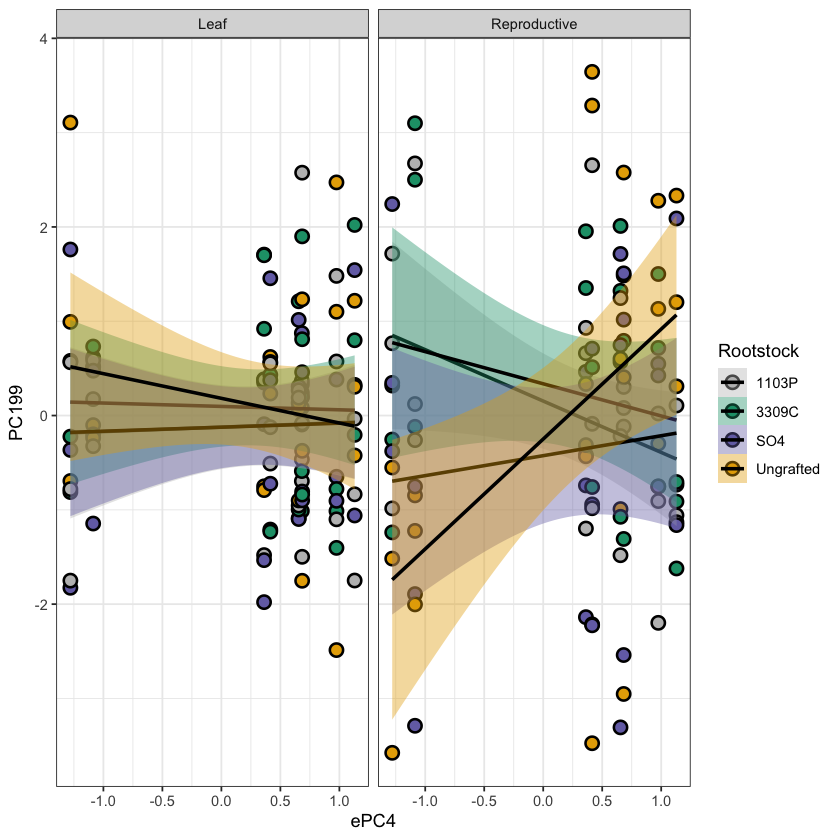

In [218]:
plot_TRE_main(pcax_means, 'PC199', 'ePC4')

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


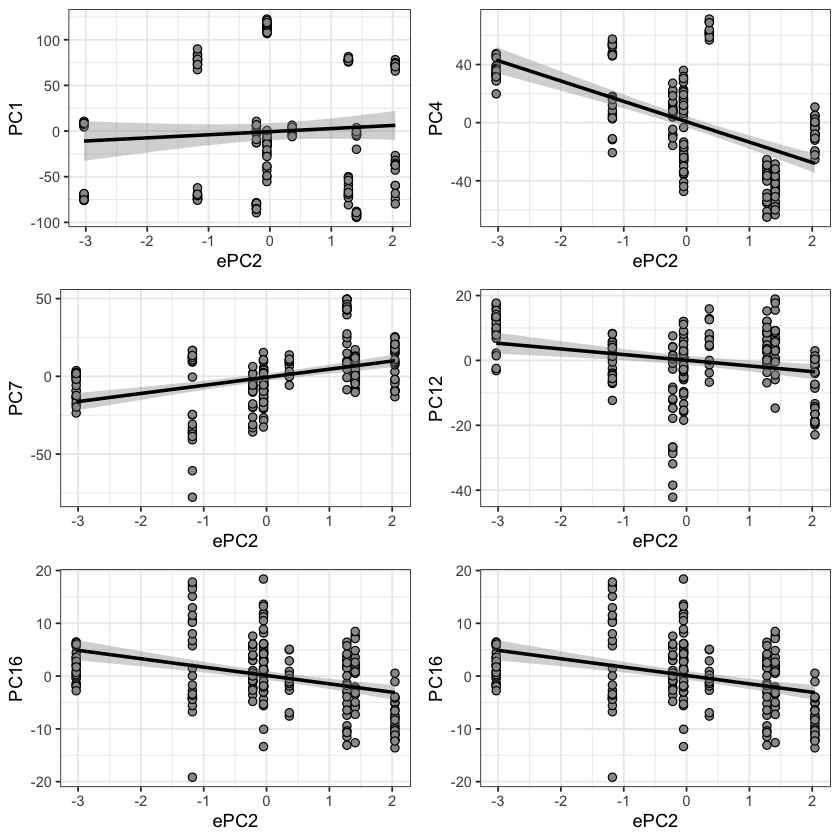

In [87]:
aa <- ggplot(pcax_means, aes(x=ePC2, y=PC198)) + 
  geom_point(size=2, shape=21, fill='grey60') +
  stat_smooth(method='lm', color='black') + 
#   scale_fill_manual(values=t_palette) + 
#   facet_wrap('Tissue') + 
  theme_bw()

bb <- ggplot(pcax_means, aes(x=ePC2, y=PC198)) + 
  geom_point(size=2, shape=21, fill='grey60') +
  stat_smooth(method='lm', color='black') + 
#   scale_fill_manual(values=t_palette) + 
#   facet_wrap('Tissue') + 
  theme_bw()

cc <- ggplot(pcax_means, aes(x=ePC2, y=PC7)) + 
  geom_point(size=2, shape=21, fill='grey60') +
  stat_smooth(method='lm', color='black') + 
#   scale_fill_manual(values=t_palette) + 
#   facet_wrap('Tissue') + 
  theme_bw()

dd <- ggplot(pcax_means, aes(x=ePC2, y=PC12)) + 
  geom_point(size=2, shape=21, fill='grey60') +
  stat_smooth(method='lm', color='black') + 
#   scale_fill_manual(values=t_palette) + 
#   facet_wrap('Tissue') + 
  theme_bw()

ee <- ggplot(pcax_means, aes(x=ePC2, y=PC16)) + 
  geom_point(size=2, shape=21, fill='grey60') +
  stat_smooth(method='lm', color='black') + 
#   scale_fill_manual(values=t_palette) + 
#   facet_wrap('Tissue') + 
  theme_bw()

ff <- ggplot(pcax_means, aes(x=ePC2, y=PC16)) + 
  geom_point(size=2, shape=21, , fill='grey60') +
  stat_smooth(method='lm', color='black') + 
#   scale_fill_manual(values=t_palette) + 
#   facet_wrap('Tissue') + 
  theme_bw()

ggpubr::ggarrange(aa, bb, cc, dd, ee, ff, 
                 nrow=3, ncol=2, common.legend=T)

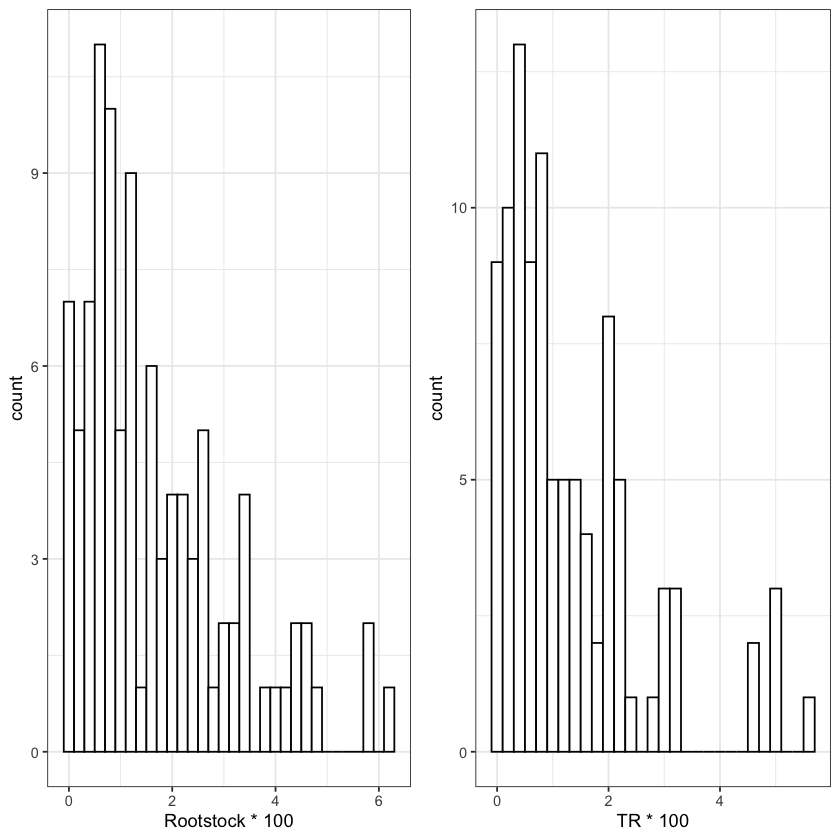

In [34]:
aa <- ggplot(PVEs, aes(x=Rootstock * 100)) +
  geom_histogram(color='black', fill='white', binwidth=0.2) + 
  theme_bw()

bb <- ggplot(PVEs, aes(x=TR * 100)) +
  geom_histogram(color='black', fill='white', binwidth=0.2) + 
  theme_bw()

ggpubr::ggarrange(aa, bb, ncol=2)

In [64]:
pca <- prcomp(vsd_counts_varFilt, center=T, scale=T)
pcax <- as.data.frame(pca$x)
pcax <- merge(pcax, meta, by=0)

In [65]:
summary(pca)

Importance of components:
                           PC1     PC2      PC3      PC4      PC5     PC6
Standard deviation     68.9952 54.9056 43.24631 37.47349 29.70248 26.0398
Proportion of Variance  0.1952  0.1236  0.07667  0.05757  0.03617  0.0278
Cumulative Proportion   0.1952  0.3187  0.39542  0.45300  0.48916  0.5170
                           PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     23.3205 21.29272 18.35058 16.17725 15.27507 13.32489
Proportion of Variance  0.0223  0.01859  0.01381  0.01073  0.00957  0.00728
Cumulative Proportion   0.5393  0.55785  0.57165  0.58238  0.59195  0.59923
                           PC13     PC14     PC15     PC16    PC17    PC18
Standard deviation     12.66662 11.85141 10.98523 10.61955 9.99226 9.81558
Proportion of Variance  0.00658  0.00576  0.00495  0.00462 0.00409 0.00395
Cumulative Proportion   0.60580  0.61156  0.61651  0.62113 0.62523 0.62918
                         PC19    PC20    PC21    PC22    PC23    PC24    P

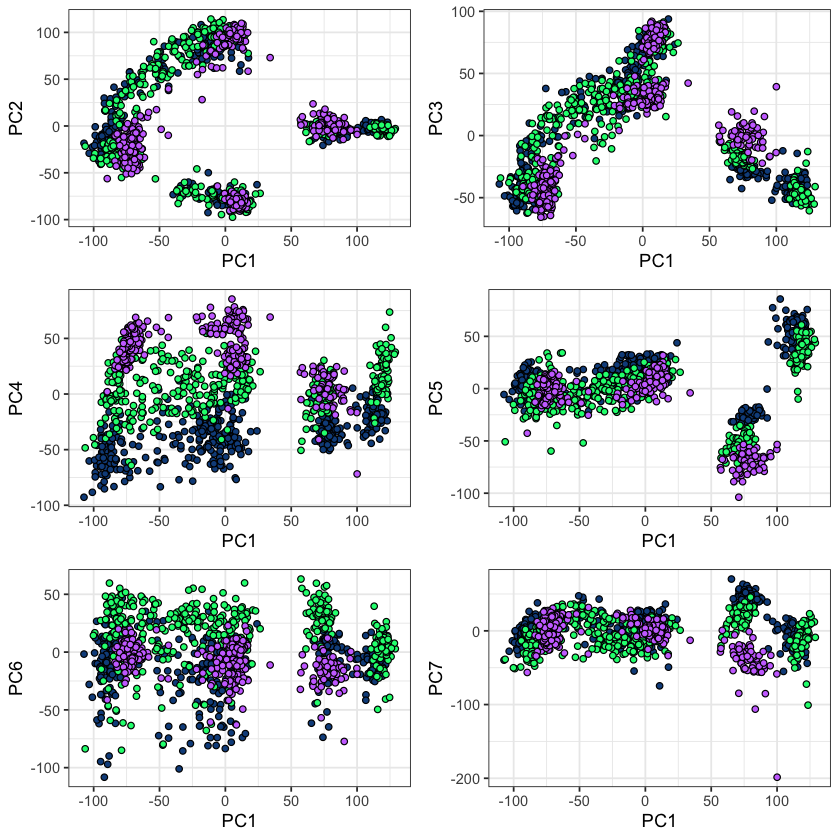

In [67]:
aa <- ggplot(pcax, aes(PC1, PC2, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

bb <- ggplot(pcax, aes(PC1, PC3, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

cc <- ggplot(pcax, aes(PC1, PC4, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

dd <- ggplot(pcax, aes(PC1, PC5, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

ee <- ggplot(pcax, aes(PC1, PC6, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

ff <- ggplot(pcax, aes(PC1, PC7, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

ggpubr::ggarrange(aa, bb, cc, dd, ee, ff,
                  nrow=3, ncol=2, legend=F)

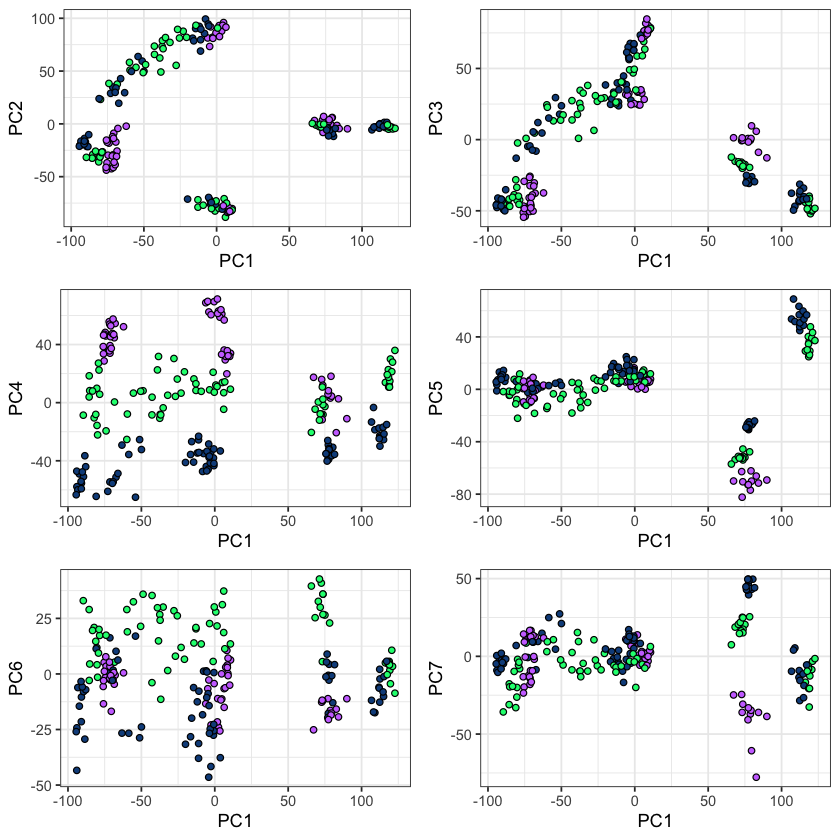

In [68]:
aa <- ggplot(pcax_means, aes(PC1, PC2, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

bb <- ggplot(pcax_means, aes(PC1, PC3, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

cc <- ggplot(pcax_means, aes(PC1, PC4, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

dd <- ggplot(pcax_means, aes(PC1, PC5, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

ee <- ggplot(pcax_means, aes(PC1, PC6, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

ff <- ggplot(pcax_means, aes(PC1, PC7, fill=Year)) + 
  geom_point(shape=21) + 
  scale_fill_manual(values=y_palette) + 
  theme_bw()

ggpubr::ggarrange(aa, bb, cc, dd, ee, ff,
                  nrow=3, ncol=2, legend=F)

In [161]:
## sample 100 genes to test
genes <- vsd_counts_varFilt[, sample(1:ncol(vsd_counts_varFilt), 10000)]
dim(genes)
#head(genes)

[1]  1178 10000

In [162]:
meta <- read.csv('1719_treatments.csv')
head(meta)

X          sampleName Year Tissue Phenology indexer                 
1 A1Y1_001_L A1Y1_001_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_A_2
2 A1Y1_002_L A1Y1_002_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_A_3
3 A1Y1_003_L A1Y1_003_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_B_2
4 A1Y1_004_L A1Y1_004_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_B_2
5 A1Y1_005_L A1Y1_005_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_C_2
6 A1Y1_006_L A1Y1_006_L 2017 Leaf   Anthesis  2017_Anthesis_Leaf_8_C_3
  Rootstock Irrigation Row Block
1 1103P     None       8   A    
2 1103P     None       8   A    
3 3309C     None       8   A    
4 3309C     None       8   A    
5 SO4       None       8   A    
6 SO4       None       8   A

In [163]:
get_vineid <- function(xi){
    vineid <- paste(xi[4], xi[5], xi[6], sep='')
    return(vineid)
}

x <- str_split(meta$indexer, '_')
meta$vineid <- unlist(lapply(X=x, FUN=get_vineid))
meta$yrPheno <- paste(meta$Year, meta$Phenology, sep='_')


meta %>% sample_n(15)

X          sampleName Year Tissue       Phenology
1  A1Y2_329_R A1Y2_329_R 2018 Reproductive Veraison 
2  A1Y1_136_R A1Y1_136_R 2017 Reproductive Veraison 
3  A1Y2_273_R A1Y2_273_R 2018 Reproductive Anthesis 
4  A1Y2_420_L A1Y2_420_L 2018 Leaf         Harvest  
5  A1Y3_486_L A1Y3_486_L 2019 Leaf         Anthesis 
6  A1Y3_585_L A1Y3_585_L 2019 Leaf         Harvest  
7  A1Y1_080_R A1Y1_080_R 2017 Reproductive Veraison 
8  A1Y1_201_L A1Y1_201_L 2017 Leaf         Harvest  
9  A1Y2_249_L A1Y2_249_L 2018 Leaf         Anthesis 
10 A1Y1_213_R A1Y1_213_R 2017 Reproductive Harvest  
11 A1Y2_335_L A1Y2_335_L 2018 Leaf         Veraison 
12 A1Y1_073_R A1Y1_073_R 2017 Reproductive Veraison 
13 A1Y1_024_R A1Y1_024_R 2017 Reproductive Anthesis 
14 A1Y2_352_L A1Y2_352_L 2018 Leaf         Veraison 
15 A1Y1_093_R A1Y1_093_R 2017 Reproductive Veraison 
   indexer                           Rootstock Irrigation Row Block vineid
1  2018_Veraison_Reproductive_13_A_2 SO4       None       13  B     13A2  
2  2017_Veraison_Reproductive_15_D_3 SO4       None       15  C     15D3  
3  2018_Anthesis_Reproductive_15_A_2 Ungrafted None       15  C     15A2  
4  2018_Harvest_Leaf_15_B_3          3309C     None       15  C     15B3  
5  2019_Anthesis_Leaf_14_C_3         Ungrafted RDI        14  C     14C3  
6  2019_Harvest_Leaf_9_A_2           Ungrafted RDI         9  A     9A2   
7  2017_Veraison_Reproductive_8_D_3  Ungrafted None        8  A     8D3   
8  2017_Harvest_Leaf_15_A_2          Ungrafted None       15  C     15A2  
9  2018_Anthesis_Leaf_12_A_2         1103P     Full       12  B     12A2  
10 2017_Harvest_Reproductive_16_C_2  SO4       Full       16  C     16C2  
11 2018_Veraison_Leaf_13_D_2         Ungrafted None       13  B     13D2  
12 2017_Veraison_Reproductive_8_A_2  1103P     None        8  A     8A2   
13 2017_Anthesis_Reproductive_10_D_3 1103P     Full       10  A     10D3  
14 2018_Veraison_Leaf_15_D_3         SO4       None       15  C     15D3  
15 2017_Veraison_Reproductive_10_C_2 Ungrafted Full       10  A     10C2  
   yrPheno      
1  2018_Veraison
2  2017_Veraison
3  2018_Anthesis
4  2018_Harvest 
5  2019_Anthesis
6  2019_Harvest 
7  2017_Veraison
8  2017_Harvest 
9  2018_Anthesis
10 2017_Harvest 
11 2018_Veraison
12 2017_Veraison
13 2017_Anthesis
14 2018_Veraison
15 2017_Veraison

In [164]:
genes$sampleName <- rownames(genes)
genes <- merge(genes, meta, by='sampleName')
#head(genes)

In [165]:
yrPheno2Date <- data.frame(yrPheno = c('2017_Anthesis', '2017_Veraison', '2017_Harvest', 
                                       '2018_Anthesis', '2018_Veraison', '2018_Harvest', 
                                       '2019_Anthesis', '2019_Veraison', '2019_Harvest'),
                          Date = c('2017-05-22', '2017-07-30', '2017-09-25', 
                                   '2018-05-30', '2018-08-01', '2018-09-17', 
                                   '2019-05-23', '2019-08-05', '2019-09-17'))

yrPheno2Date$Date <- as.Date(yrPheno2Date$Date)
yrPheno2Date

yrPheno       Date      
1 2017_Anthesis 2017-05-22
2 2017_Veraison 2017-07-30
3 2017_Harvest  2017-09-25
4 2018_Anthesis 2018-05-30
5 2018_Veraison 2018-08-01
6 2018_Harvest  2018-09-17
7 2019_Anthesis 2019-05-23
8 2019_Veraison 2019-08-05
9 2019_Harvest  2019-09-17

In [166]:
genes <- merge(genes, yrPheno2Date, by='yrPheno')
#head(genes)

In [167]:
genes$yrPheno <- factor(genes$yrPheno, levels=c('2017_Anthesis', '2017_Veraison', '2017_Harvest',
                                                '2018_Anthesis', '2018_Veraison', '2018_Harvest',
                                                '2019_Anthesis', '2019_Veraison', '2019_Harvest'))
genes$Phenology <- factor(genes$Phenology, levels=c('Anthesis', 'Veraison', 'Harvest'))
genes$Year <- as.factor(genes$Year)
genes$Rootstock <- factor(genes$Rootstock, levels=c('Ungrafted', '1103P', '3309C', 'SO4'))

In [168]:
genes <- merge(genes, new_meta, by='Date')

In [169]:
genes_to_model <- colnames(genes) %>% .[str_detect(string=., pattern='Vitvi')]

In [170]:
# genuinely shocked this is this clean
table(genes$vineid)


10A2 10A3 10B3 10C2 10C3 10D2 10D3 11A2 11A3 11B2 11B3 11C2 11C3 11D2 11D3 12A2 
  17   17   17   17   17   17   16   17   17   17   17   17   16   17   17   17 
12A3 12B2 12B3 12C2 12C3 12D2 12D3 13A2 13A3 13B2 13B3 13C2 13C3 13D2 13D3 14A2 
  16   17   16   16   16   16   17   15   17   17   16   17   17   17   17   17 
14A3 14B2 14B3 14C2 14C3 14D2 14D3 15A2 15A3 15B2 15B3 15C2 15C3 15D2 15D3 16A2 
  15   15   16   17   16   17   16   16   17   17   16   17   17   16   17   17 
16A3 16B2 16B3 16C2 16C3 16D2 16D3  8A2  8A3  8B2  8B3  8C2  8C3  8D2  8D3  9A2 
  17   16   16   17   15   16   17   17   17   18   16   17   17   16   17   15 
 9A3  9B2  9B3  9C2  9C3  9D2  9D3 
  16   17   17   17   17   17   17 

In [171]:
get_REML <- function(d, meta){
    df <- data.frame(conc=d, vineid <- meta$vineid)
    lmod <- lmer(scale(conc) ~ (1|vineid),  data=df)
    return(resid(lmod))
}

x <- apply(X=select(genes, genes_to_model), FUN=get_REML, MARGIN=2, meta=genes)
x <- as.data.frame(x)
# x <- apply(X=x, MARGIN=2, FUN=scale)
# x <- as.data.frame(x)
x$Block <- genes$Block
x$Rootstock <- genes$Rootstock
x$Tissue <- genes$Tissue

x$yrPheno <- genes$yrPheno
x <- merge(x, yrPheno2Date, by='yrPheno')

x <- x %>%
  group_by(Date, Block, Tissue, Rootstock) %>%
  summarize_at(vars(genes_to_model), ~ mean(.x))

x <- merge(x, new_meta, by='Date')
#x <- merge(x, weather_df, by='Date')
#colnames(x)

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular
boundary (singul

[1] "Date"          "Block"         "Tissue"        "Rootstock"    
    [5] "Vitvi16g02032" "Vitvi08g01548" "Vitvi05g01999" "Vitvi05g01569"
    [9] "Vitvi12g00760" "Vitvi16g00728" "Vitvi17g00126" "Vitvi18g00337"
   [13] "Vitvi05g00394" "Vitvi06g00441" "Vitvi07g01445" "Vitvi11g00957"
   [17] "Vitvi17g00252" "Vitvi09g01303" "Vitvi17g00510" "Vitvi02g00548"
   [21] "Vitvi05g00688" "Vitvi07g00505" "Vitvi18g02961" "Vitvi18g00065"
   [25] "Vitvi06g01507" "Vitvi06g00119" "Vitvi08g02352" "Vitvi16g00075"
   [29] "Vitvi04g01838" "Vitvi18g02711" "Vitvi15g00578" "Vitvi07g01578"
   [33] "Vitvi14g03010" "Vitvi17g01024" "Vitvi06g00048" "Vitvi18g00868"
   [37] "Vitvi09g00621" "Vitvi06g01256" "Vitvi11g01140" "Vitvi02g01171"
   [41] "Vitvi12g02354" "Vitvi14g00762" "Vitvi07g01916" "Vitvi05g01806"
   [45] "Vitvi13g00657" "Vitvi04g01176" "Vitvi01g00626" "Vitvi15g01128"
   [49] "Vitvi04g01560" "Vitvi07g00102" "Vitvi15g01507" "Vitvi14g00298"
   [53] "Vitvi16g01194" "Vitvi17g01045" "Vitvi11g01039" "Vitvi07g00279"
   [57] "Vitvi02g00714" "Vitvi02g00199" "Vitvi06g00349" "Vitvi06g01615"
   [61] "Vitvi05g01404" "Vitvi01g02218" "Vitvi12g02167" "Vitvi04g00378"
   [65] "Vitvi04g02071" "Vitvi01g00116" "Vitvi01g01776" "Vitvi03g00691"
   [69] "Vitvi15g00714" "Vitvi16g01020" "Vitvi07g02248" "Vitvi18g02134"
   [73] "Vitvi10g01915" "Vitvi17g01556" "Vitvi02g01287" "Vitvi01g00080"
   [77] "Vitvi16g00145" "Vitvi11g00698" "Vitvi13g01385" "Vitvi15g00446"
   [81] "Vitvi08g00668" "Vitvi04g01641" "Vitvi01g02270" "Vitvi07g02233"
   [85] "Vitvi17g01610" "Vitvi06g01656" "Vitvi05g01577" "Vitvi19g02388"
   [89] "Vitvi08g00877" "Vitvi18g00602" "Vitvi09g01404" "Vitvi10g02309"
   [93] "Vitvi12g02229" "Vitvi18g03367" "Vitvi08g00902" "Vitvi01g00216"
   [97] "Vitvi16g00624" "Vitvi17g00315" "Vitvi01g01801" "Vitvi02g00117"
  [101] "Vitvi13g01950" "Vitvi01g01372" "Vitvi04g01979" "Vitvi13g01243"
  [105] "Vitvi01g00669" "Vitvi10g01748" "Vitvi08g01923" "Vitvi07g00295"
  [109] "Vitvi17g00222" "Vitvi10g01616" "Vitvi16g00723" "Vitvi08g01073"
  [113] "Vitvi18g00280" "Vitvi14g02843" "Vitvi14g02628" "Vitvi08g01886"
  [117] "Vitvi05g00490" "Vitvi03g01291" "Vitvi14g00430" "Vitvi07g02031"
  [121] "Vitvi07g02894" "Vitvi05g00968" "Vitvi08g01319" "Vitvi08g01831"
  [125] "Vitvi17g00153" "Vitvi01g02095" "Vitvi06g00517" "Vitvi12g02138"
  [129] "Vitvi06g00639" "Vitvi18g00231" "Vitvi07g00326" "Vitvi08g01180"
  [133] "Vitvi01g00136" "Vitvi12g00741" "Vitvi13g02276" "Vitvi16g01012"
  [137] "Vitvi19g00396" "Vitvi17g00422" "Vitvi06g00429" "Vitvi13g00019"
  [141] "Vitvi11g01133" "Vitvi16g00637" "Vitvi02g00363" "Vitvi12g01114"
  [145] "Vitvi16g00990" "Vitvi05g01972" "Vitvi11g00035" "Vitvi02g00192"
  [149] "Vitvi17g01354" "Vitvi08g02392" "Vitvi11g00333" "Vitvi10g00679"
  [153] "Vitvi18g01754" "Vitvi17g00557" "Vitvi05g00100" "Vitvi19g01801"
  [157] "Vitvi11g01581" "Vitvi02g00380" "Vitvi02g01228" "Vitvi12g00484"
  [161] "Vitvi04g01412" "Vitvi02g00104" "Vitvi11g01465" "Vitvi02g00693"
  [165] "Vitvi13g01394" "Vitvi01g01561" "Vitvi19g01831" "Vitvi14g02541"
  [169] "Vitvi01g00249" "Vitvi07g00424" "Vitvi07g02877" "Vitvi05g00546"
  [173] "Vitvi06g00715" "Vitvi03g01303" "Vitvi07g00088" "Vitvi02g01809"
  [177] "Vitvi19g00759" "Vitvi19g00442" "Vitvi14g01951" "Vitvi19g00207"
  [181] "Vitvi16g00742" "Vitvi08g00725" "Vitvi01g01821" "Vitvi13g02467"
  [185] "Vitvi17g00090" "Vitvi13g02519" "Vitvi10g00311" "Vitvi05g00418"
  [189] "Vitvi06g00422" "Vitvi06g01346" "Vitvi01g00832" "Vitvi02g01695"
  [193] "Vitvi12g01805" "Vitvi03g00334" "Vitvi13g02291" "Vitvi13g00704"
  [197] "Vitvi18g01023" "Vitvi08g01143" "Vitvi09g01640" "Vitvi15g01765"
  [201] "Vitvi18g00224" "Vitvi01g01072" "Vitvi08g02138" "Vitvi06g00369"
  [205] "Vitvi06g00502" "Vitvi18g00291" "Vitvi06g00022" "Vitvi08g01069"
  [209] "Vitvi19g00240" "Vitvi17g00429" "Vitvi14g00429" "Vitvi01g00232"
  [213] "Vitvi18g02469" "Vitvi19g01730" "Vitvi07g00200" "Vitvi07g03123"
  [217] "Vitvi08g00180" "Vitvi07g00267" "Vitvi08g01127" "Vitvi07g01496"
  [221] "Vitvi19g00393" "Vitvi04g01484" "Vit

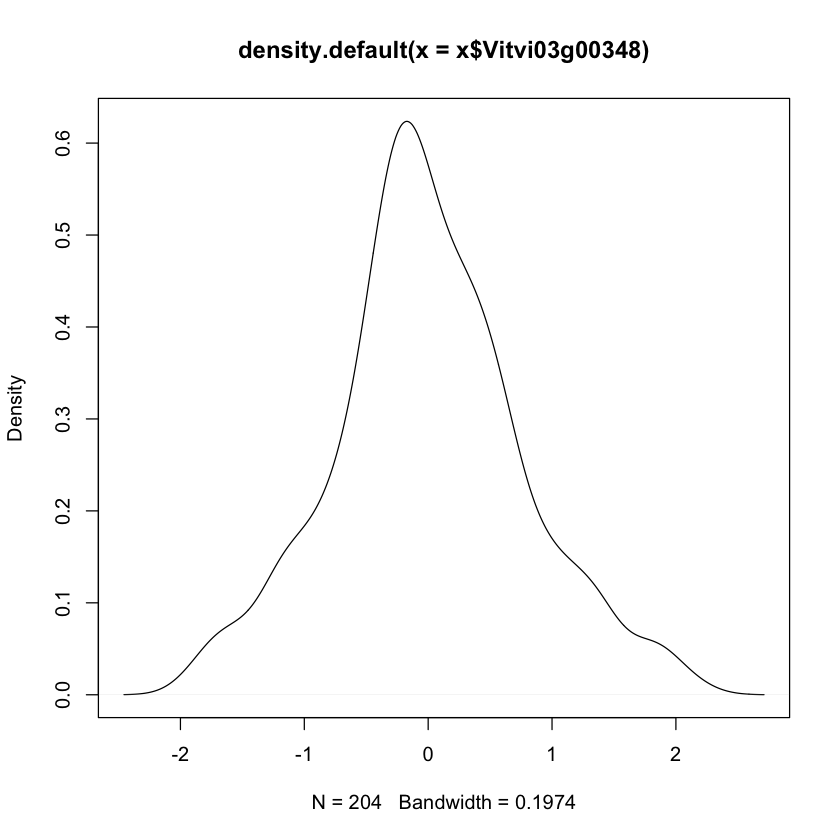

In [99]:
plot(density(x$Vitvi03g00348))

In [137]:
0.05/24392

[1] 2.049852e-06

In [174]:
# lmod <- lm(scale(Vitvi17g00195) ~ Tissue*Rootstock*avgmaxT, genes)
# lmod_anova <- car::Anova(lmod, type=3)
# lmod_anova

sig_genes <- c()

for (gene in colnames(select(x, genes_to_model))){
    d_sub <- x %>% select(gene, Tissue, Rootstock, sumPrecip)
    colnames(d_sub) <- c('gene', 'Tissue', 'Rootstock', 'sumPrecip')
    
    # remove values more than 15 sd away
    d_sub <- d_sub[d_sub$gene < 20,]
    
    # count number of '0's
    tmp <- d_sub[d_sub$gene < 0,]

    # if sd > 0 and number of 0's < half of all data
    if (sd(d_sub$gene) > 0 & dim(tmp)[1]/dim(d_sub)[1] < 0.5){   
        lmod <- lm(gene ~ Tissue*Rootstock*sumPrecip, d_sub)
        lmod_anova <- car::Anova(lmod, type=3)
        if (lmod_anova['sumPrecip', 'Pr(>F)'] <= 2.05e-6){
            sig_genes <- c(sig_genes, gene)
        }
    }
}

length(sig_genes)

[1] 1197

In [32]:
lmod_anova
SS <- lmod_anova$Sum[2:dim(lmod_anova)[1]]
PVE <- SS / sum(SS)
PVE

# t_PVE <- PVE[2]
# rt_PVE <- PVE[3]

Sum Sq       Df   F value      Pr(>F)      
(Intercept)              1.280834e+01    1 12.949377130 0.0003334958
Tissue                   4.956440e+00    1  5.011016747 0.0253752684
Rootstock                5.130216e-01    3  0.172890190 0.9147470427
avgmaxT                  1.288000e+01    1 13.021829494 0.0003209758
Tissue:Rootstock         4.230930e-02    3  0.014258395 0.9976756249
Tissue:avgmaxT           4.212981e+00    1  4.259371618 0.0392559773
Rootstock:avgmaxT        6.376511e-01    3  0.214890807 0.8861108811
Tissue:Rootstock:avgmaxT 1.034162e-02    3  0.003485164 0.9997163712
Residuals                1.149344e+03 1162           NA           NA

[1] 4.226891e-03 4.375088e-04 1.098417e-02 3.608171e-05 3.592864e-03
[6] 5.437939e-04 8.819413e-06 9.801699e-01

`geom_smooth()` using formula 'y ~ x'


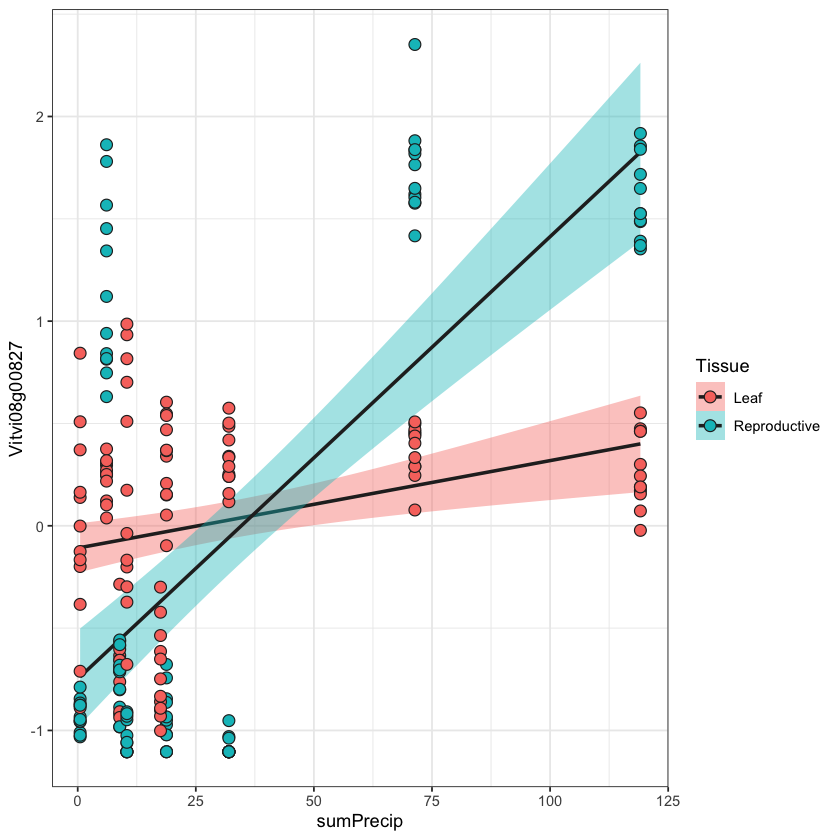

In [139]:
ggplot(x, aes(x=sumPrecip, y=Vitvi08g00827, fill=Tissue)) +  
  stat_smooth(method='lm', color='grey15') + 
  geom_point(size=3, shape=21, color='grey15') +
  ylab("Vitvi08g00827") + 
  theme_bw()

In [118]:
tmp <- x %>% select(Vitvi14g01348, Tissue, Rootstock, Block) 
dim(tmp)
dim(tmp[tmp$Vitvi14g01348 < 0,])

[1] 204   4

[1] 179   4

[1] 0.8333333

In [72]:
car::Anova(lmod, type=3)

Sum Sq      Df   F value     Pr(>F)      
(Intercept)               29.8473913    1  94.2246779 1.794141e-21
Tissue                    23.6576533    1  74.6844082 1.800872e-17
Rootstock                  0.1807921    3   0.1902464 9.030732e-01
avgmaxT                   31.9873019    1 100.9801221 7.709329e-23
Tissue:Rootstock           0.1993553    3   0.2097804 8.896606e-01
Tissue:avgmaxT            54.9526694    1 173.4790661 5.007126e-37
Rootstock:avgmaxT          0.1546206    3   0.1627063 9.214703e-01
Tissue:Rootstock:avgmaxT   0.1896580    3   0.1995759 8.966999e-01
Residuals                368.0847683 1162          NA           NA

In [28]:
models <- list()
anovas <- list()
tissue_p <- c()
rootstock_p <- c()
term_p <- c()
tisue_rootstock_p <- c()
tissue_term_p <- c()
rootstock_term_p <- c()
tissue_rootstock_term_p <- c()

ds <- list()

tiss_PVE <- c()
root_PVE <- c()
term_PVE <- c()
tiss_root_PVE <- c()
tiss_term_PVE <- c()
root_term_PVE <- c()
tiss_root_term_PVE <- c()


ions <- colnames(select(x, B:Cd))
terms <- c('avgdDP', 'sumPrecip', 'avgavgT', 'sumRad', 'avgdT', 'evap')

for (term in terms){
    for (ion in ions){
        d <- x[, c(ion, 'rootstock', term)]
        colnames(d) <- c('ion', 'rootstock', 'term')
        
        # fit model, anova
        lmod <- lm(ion~rootstock*term, d)
        lmod_anova <- car::Anova(lmod, type=3)
        
        # PVE
        SS <- lmod_anova$Sum[2:dim(lmod_anova)[1]]
        PVE <- SS / sum(SS)
        tiss_PVE <- PVE[1]
        root_PVE <- PVE[2]
        term_PVE <- PVE[3]
        tiss_root_PVE <- PVE[4]
        tiss_term_PVE <- PVE[5]
        root_term_PVE <- PVE[6]
        tiss_root_term_PVE <- PVE[7]
        
        
        # store outputs
        list_idx <- str_interp("${ion}_${term}")
        models[[list_idx]] <- lmod
        anovas[[list_idx]] <- lmod_anova
        
        tissue_p <- c(tissue_p, lmod_anova$Pr[2])
        rootstock_p <- c(rootstock_p, lmod_anova$Pr[3])
        term_p <- c(term_p, lmod_anova$Pr[4])
        tisue_rootstock_p <- c(term_p, lmod_anova$Pr[5])
        tissue_term_p <- c(tissue_term_p, lmod_anova$Pr[6])
        rootstock_term_p <- c(rootstock_term_p, lmod_anova$Pr[7])
        tissue_rootstock_term_p <- c(tissue_rootstock_term_p, )

        ds[[list_idx]] <- d
        
    }
}

#p.mat
p.vals <- c(tissue_p, rootstock_p, term_p, tissue_rootstock_p, 
            tissue_term_p, rootstock_term_p, tissue_rootstock_term_p,)
p.mat <- data.frame(p.values=p.vals, p.adjust=p.adjust(p.vals, method='fdr'))

#leftoff here
p.mat$model <- rep(names(anovas), 3)
p.mat$term <- c(rep('rootstock', length(ions)*length(terms)), 
                rep('term', length(ions)*length(terms)), 
                rep('interaction', length(ions)*length(terms)))
write.csv(p.mat, '1719_weatherInteractions_vineid.csv')

#PVE.mat
PVE.mat <- data.frame(PVE=c(term_PVE, interaction_PVE),
                      ion=rep(ions, length(terms)),
                      term=c(rep(terms, each=length(ions)),
                             rep(paste('rs', terms, sep='_'), each=length(ions))))

head(PVE.mat)

PVE         ion term  
1 0.105352208 B   avgdDP
2 0.002143389 Na  avgdDP
3 0.153250181 Mg  avgdDP
4 0.025115715 Al  avgdDP
5 0.513260013 P   avgdDP
6 0.003395857 S   avgdDP

In [29]:
head(p.mat)

p.values  p.adjust model     term     
1 0.6564036 0.999696 B_avgdDP  rootstock
2 0.8080884 0.999696 Na_avgdDP rootstock
3 0.2825982 0.840788 Mg_avgdDP rootstock
4 0.9782614 0.999696 Al_avgdDP rootstock
5 0.8115104 0.999696 P_avgdDP  rootstock
6 0.5086489 0.999696 S_avgdDP  rootstock

In [30]:
levels(PVE.mat$term)

[1] "avgavgT"      "avgdDP"       "avgdT"        "evap"         "rs_avgavgT"  
 [6] "rs_avgdDP"    "rs_avgdT"     "rs_evap"      "rs_sumPrecip" "rs_sumRad"   
[11] "sumPrecip"    "sumRad"

In [31]:
PVE.mat$ion <- factor(PVE.mat$ion, levels=rev(sort(ions)))
PVE.mat$term <- factor(PVE.mat$term, 
                       levels=c('avgdDP', 'sumPrecip', 'avgavgT', 
                                'sumRad', 'avgdT', 'evap',
                                'rs_avgdDP', 'rs_sumPrecip', 'rs_avgavgT', 
                                'rs_sumRad', 'rs_avgdT', 'rs_evap'),
                       
                       labels=c('dDP', 'sumPrecip', 'avgT', 'sumRad', 'dT', 'Evap',  
                                'rs_dDP', 'rs_sumPrecip', 'rs_avgT', 'rs_sumRad', 'rs_dT', 'rs_Evap'))

In [32]:
pdf("1719_weatherModels_vineid.pdf", height=6, width=12)
ggplot(PVE.mat, aes(x=term, y=ion, fill=PVE*100)) + 
  geom_tile(color='white', size=0.5) + 
  scale_fill_viridis_c(option='inferno', direction=-1, na.value = "transparent") + 
  labs(x = "Factor", y="") +
  scale_x_discrete(position='top') +
  #ggpubr::theme_classic2() + 
  theme_minimal() + 
  theme(axis.text=element_text(size=14), 
        axis.title=element_text(size=12, face="bold"),
        legend.position = "bottom")
dev.off()

pdf 
  2

In [33]:
PVE.mat_copy <- PVE.mat
p.mat_filt <- p.mat[p.mat$term != 'rootstock',]
head(p.mat_filt)

PVE.mat_copy$PVE[which(p.mat_filt$p.adjust > 0.05)] <- NA 
PVE.mat_copy <- na.omit(PVE.mat_copy)


pdf("1719_weatherModels_pval_vineid.pdf", height=6, width=8)
ggplot(PVE.mat_copy, aes(x=term, y=ion, fill=PVE*100)) + 
  geom_tile(color='white', size=0.5) + 
  scale_fill_viridis_c(option='inferno', direction=-1, na.value = "transparent") + 
  labs(x = "Factor", y="") +
  scale_x_discrete(position='top') +
  #ggpubr::theme_classic2() + 
  theme_minimal() + 
  theme(axis.text=element_text(size=12), 
        axis.title=element_blank(),
        legend.position = "bottom")
dev.off()

p.values     p.adjust     model     term
121 1.246923e-06 1.043935e-05 B_avgdDP  term
122 5.027892e-01 9.996960e-01 Na_avgdDP term
123 2.512306e-09 3.116001e-08 Mg_avgdDP term
124 2.147712e-02 9.096193e-02 Al_avgdDP term
125 1.118165e-34 4.025396e-32 P_avgdDP  term
126 3.965532e-01 9.996960e-01 S_avgdDP  term

pdf 
  2

In [34]:
p.mat[p.mat$p.adjust <= 0.05 & p.mat$term=='term', ]
p.mat[p.mat$p.adjust <= 0.05 & p.mat$term=='interaction', ]

p.values     p.adjust     model        term
121 1.246923e-06 1.043935e-05 B_avgdDP     term
123 2.512306e-09 3.116001e-08 Mg_avgdDP    term
125 1.118165e-34 4.025396e-32 P_avgdDP     term
127 7.163380e-07 6.140040e-06 K_avgdDP     term
129 5.163278e-04 3.097967e-03 Fe_avgdDP    term
130 3.404883e-09 3.886558e-08 Mn_avgdDP    term
131 4.783804e-23 2.152712e-21 Co_avgdDP    term
132 3.199256e-04 2.020583e-03 Ni_avgdDP    term
133 4.346451e-27 3.129445e-25 Cu_avgdDP    term
134 1.003020e-08 1.094204e-07 Zn_avgdDP    term
135 5.266637e-13 8.618134e-12 As_avgdDP    term
137 1.208100e-26 7.248599e-25 Rb_avgdDP    term
138 8.551161e-14 1.710232e-12 Sr_avgdDP    term
139 1.749637e-06 1.399710e-05 Mo_avgdDP    term
140 3.992293e-11 5.323057e-10 Cd_avgdDP    term
141 2.444370e-15 5.499833e-14 B_sumPrecip  term
142 9.528950e-06 6.860844e-05 Na_sumPrecip term
144 1.991931e-03 1.120461e-02 Al_sumPrecip term
145 2.212229e-23 1.137718e-21 P_sumPrecip  term
147 2.596668e-09 3.116001e-08 K_sumPrecip  term
148 1.308504e-06 1.070594e-05 Ca_sumPrecip term
149 2.013279e-11 2.801581e-10 Fe_sumPrecip term
153 4.214584e-17 1.083750e-15 Cu_sumPrecip term
157 6.056705e-18 1.677241e-16 Rb_sumPrecip term
159 1.448279e-13 2.482763e-12 Mo_sumPrecip term
160 1.216859e-13 2.190346e-12 Cd_sumPrecip term
161 1.045837e-13 1.981586e-12 B_avgavgT    term
162 5.447253e-03 2.723626e-02 Na_avgavgT   term
163 6.397095e-06 4.899903e-05 Mg_avgavgT   term
165 2.471295e-28 4.448331e-26 P_avgavgT    term
... ...          ...          ...          ... 
187 2.932843e-15 6.210726e-14 K_sumRad     term
188 5.284519e-06 4.135710e-05 Ca_sumRad    term
191 3.051724e-04 1.961823e-03 Co_sumRad    term
196 1.633620e-09 2.100368e-08 Se_sumRad    term
197 2.795418e-08 2.959855e-07 Rb_sumRad    term
198 5.967360e-12 9.340215e-11 Sr_sumRad    term
199 7.818487e-06 5.863865e-05 Mo_sumRad    term
200 9.385250e-03 4.387909e-02 Cd_sumRad    term
201 7.915543e-04 4.596122e-03 B_avgdT      term
202 1.794843e-07 1.700378e-06 Na_avgdT     term
203 6.672226e-12 1.000834e-10 Mg_avgdT     term
204 8.586387e-22 3.434555e-20 Al_avgdT     term
206 5.023506e-05 3.477812e-04 S_avgdT      term
208 9.954562e-28 1.169504e-25 Ca_avgdT     term
209 4.004571e-08 4.004571e-07 Fe_avgdT     term
210 2.236917e-03 1.238908e-02 Mn_avgdT     term
211 1.736549e-04 1.179543e-03 Co_avgdT     term
215 2.023364e-11 2.801581e-10 As_avgdT     term
218 1.656335e-20 5.420733e-19 Sr_avgdT     term
221 2.900773e-03 1.565399e-02 B_evap       term
223 3.278919e-03 1.735898e-02 Mg_evap      term
225 3.313240e-04 2.056494e-03 P_evap       term
227 2.913382e-03 1.565399e-02 K_evap       term
229 3.905329e-07 3.514796e-06 Fe_evap      term
230 6.787516e-07 5.959770e-06 Mn_evap      term
231 8.906824e-06 6.543789e-05 Co_evap      term
232 1.299449e-27 1.169504e-25 Ni_evap      term
233 1.855861e-03 1.060492e-02 Cu_evap      term
234 3.106562e-08 3.195321e-07 Zn_evap      term
240 1.162838e-05 8.208268e-05 Cd_evap      term

p.values     p.adjust   model        term       
251 0.0105466976 0.04867707 Co_avgdDP    interaction
271 0.0073582655 0.03628734 Co_sumPrecip interaction
291 0.0080908354 0.03936082 Co_avgavgT   interaction
352 0.0002706566 0.00177157 Ni_evap      interaction

In [35]:
calc_PVE <- function(x){
    SS <- x$Sum[2:dim(x)[1]]
    output <- SS / sum(SS)
    return (output)
}

PVE <- as.data.frame(lapply(X=anovas, FUN=calc_PVE))
d <- anovas[['B_avgdDP']]
rownames(PVE) <- rownames(d)[2:dim(d)[1]]
PVE
#sanity check
# colSums(PVE)

B_avgdDP    Na_avgdDP   Mg_avgdDP Al_avgdDP    P_avgdDP   
rootstock      0.006823020 0.004621920 0.0151377 0.0009143535 0.002210580
term           0.105352208 0.002143389 0.1532502 0.0251157146 0.513260013
rootstock:term 0.009380382 0.003858910 0.0110013 0.0008669061 0.004321956
Residuals      0.878444390 0.989375781 0.8206108 0.9731030258 0.480207452
               S_avgdDP    K_avgdDP    Ca_avgdDP   Fe_avgdDP   Mn_avgdDP   ...
rootstock      0.010951944 0.003274528 0.002211821 0.002755946 0.003578585 ...
term           0.003395857 0.111094310 0.026493709 0.056216688 0.153935512 ...
rootstock:term 0.006980623 0.001862738 0.002189610 0.001264733 0.003006832 ...
Residuals      0.978671575 0.883768424 0.969104859 0.939762633 0.839479070 ...
               Co_evap    Ni_evap    Cu_evap     Zn_evap     As_evap     
rootstock      0.01260016 0.04329471 0.003345224 0.002581580 0.0006771896
term           0.08825008 0.39508841 0.045198078 0.136537472 0.0002691339
rootstock:term 0.01455389 0.04896903 0.005694647 0.002775826 0.0013408727
Residuals      0.88459587 0.51264785 0.945762050 0.858105122 0.9977128037
               Se_evap      Rb_evap      Sr_evap      Mo_evap     Cd_evap    
rootstock      1.624179e-02 0.0005435828 0.0004283976 0.012723720 0.006262555
term           7.233821e-06 0.0073549981 0.0002219734 0.001154227 0.087546520
rootstock:term 1.494055e-02 0.0018775360 0.0010477818 0.014008780 0.004275398
Residuals      9.688104e-01 0.9902238831 0.9983018472 0.972113273 0.901915527

In [36]:
rev(sort(PVE['term', ]))
rev(sort(PVE['rootstock:term', ]))

P_avgdDP P_avgavgT Ca_avgdT  Cu_avgdDP Rb_avgdDP Ni_evap   P_sumPrecip
term 0.51326  0.4379264 0.4328248 0.427103  0.4223837 0.3950884 0.3774809  
     Al_avgdT Cu_avgavgT Co_avgdDP ... Ni_sumPrecip Na_sumRad   Zn_avgdT    
term 0.356735 0.3547227  0.3521845 ... 0.0005735304 0.000519666 0.0003537287
     As_evap      Sr_evap      Al_avgavgT   P_avgdT      Se_evap     
term 0.0002691339 0.0002219734 5.556729e-05 1.084621e-05 7.233821e-06
     Rb_avgdT     Ca_avgavgT  
term 2.808098e-06 6.233456e-07

Co_sumPrecip Co_avgavgT Ni_evap    Se_sumPrecip Co_avgdDP 
rootstock:term 0.05384515   0.05218611 0.04896903 0.03860744   0.03239831
               Mo_avgdDP  Se_avgavgT Se_sumRad  Se_avgdDP  Se_avgdT   ...
rootstock:term 0.03049091 0.02586128 0.02564744 0.02483955 0.02344098 ...
               Al_avgdDP    Mn_evap      P_evap       B_avgdT      Mn_sumRad   
rootstock:term 0.0008669061 0.0008598752 0.0008211489 0.0007553872 0.0004951132
               Ca_sumRad    Cu_avgavgT   P_avgdT      K_avgdT      K_evap      
rootstock:term 0.0004798316 0.0004460232 0.0003361686 0.0002431716 5.031721e-05

In [37]:
x_ni <- x %>% select(P, Ca, Ni, Cu, avgdDP, avgdT, evap, avgavgT, block)

p1 <- ggplot(x_ni, aes(x=avgdDP, y=scale(P))) +  
  stat_smooth(method='lm', fill='skyblue1') + 
  geom_point(size=3, shape=21, color='grey15', fill='grey75') +
  ylab("Phosphorus Z-Score") + 
  xlab("Average Dew Point (C)") + 
  theme_bw()

p2 <- ggplot(x_ni, aes(x=avgdT, y=scale(Ca))) +  
  stat_smooth(method='lm', fill='skyblue1') + 
  geom_point(size=3, shape=21, color='grey15', fill='grey75') +
  ylab("Calcium Z-Score") + 
  xlab("Average Change in Temp (C)") +
  theme_bw()

p3 <- ggplot(x_ni, aes(x=evap, y=scale(Ni))) +  
  stat_smooth(method='lm', fill='skyblue1') + 
  geom_point(size=3, shape=21, color='grey15', fill='grey75') +
  ylab("Nickel Z-Score") + 
  xlab("Evapotranspiration (mm)") + 
  theme_bw()

p4 <- ggplot(x_ni, aes(x=avgavgT, y=scale(Cu))) +  
  stat_smooth(method='lm', fill='skyblue1') + 
  geom_point(size=3, shape=21, color='grey15', fill='grey75') +
  ylab("Copper Z-Score") + 
  xlab("Average Daily Temp (C)") +
  theme_bw()

pdf("1719_weatherMainEffect_vineid.pdf", height=8, width=8)
  ggpubr::ggarrange(p1, p2, p3, p4, nrow=2, ncol=2, labels=c('A', 'B', 'C', 'D'))
dev.off()

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


pdf 
  2

In [38]:
rs_palette <- c("gray", "#1b9e77", "#7570b3", "#e6ab02")
x_ni <- x %>% select(Date, Ni, Co, avgavgT, evap, rootstock, block)
x_ni$rootstock <- factor(x_ni$rootstock, levels=c('Ungrafted', '1103P', '3309C', 'SO4'))

p5 <- ggplot(x_ni, aes(x=avgavgT, y=scale(Co), fill=rootstock)) + 
  geom_smooth(aes(color=rootstock), method='lm') + 
  scale_color_manual(values=rs_palette) + 
  geom_point(size=3, shape=21, color='grey25') + 
  scale_fill_manual(values=rs_palette) + 
  ylab("Cobalt Z-Score") + 
  xlab("Average Daily Temp (C)") +
  theme_bw()

p6 <- ggplot(x_ni, aes(x=evap, y=scale(Ni), fill=rootstock)) + 
  geom_smooth(aes(color=rootstock), method='lm') + 
  scale_color_manual(values=rs_palette) + 
  geom_point(size=3, shape=21, color='grey25') + 
  scale_fill_manual(values=rs_palette) + 
  ylab("Nickel Z-Score") + 
  xlab("Evapotranspiration (mm)") +
  theme_bw()


pdf("1719_weatherRootstock_vineid.pdf", height=12, width=8)
  ggpubr::ggarrange(p1, p2,
                    p4, p3, 
                    p5, p6, 
                    ncol=2, nrow=3, labels=c('A', 'B', 'C', 'D', 'E', 'F'), common.legend=T)
dev.off()

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


pdf 
  2

In [39]:
emmeans::emtrends(models[['Ni_evap']], var='term', data=ds[['Ni_evap']])
pairs(emmeans::emtrends(models[['Ni_evap']], var='term', data=ds[['Ni_evap']]))

 rootstock term term.trend    SE  df
 1103P     4.26      0.439 0.103 208
 3309C     4.26      0.485 0.103 208
 SO4       4.26      1.020 0.103 208
 Ungrafted 4.26      0.651 0.103 208


 contrast                                            estimate    SE  df t.ratio
 1103P,4.26455555555556 - 3309C,4.26455555555556      -0.0466 0.145 208 -0.322 
 1103P,4.26455555555556 - SO4,4.26455555555556        -0.5816 0.145 208 -4.011 
 1103P,4.26455555555556 - Ungrafted,4.26455555555556  -0.2127 0.145 208 -1.467 
 3309C,4.26455555555556 - SO4,4.26455555555556        -0.5349 0.145 208 -3.689 
 3309C,4.26455555555556 - Ungrafted,4.26455555555556  -0.1660 0.145 208 -1.145 
 SO4,4.26455555555556 - Ungrafted,4.26455555555556     0.3689 0.145 208  2.544 
 p.value
 0.9885 
 0.0005 
 0.4594 
 0.0016 
 0.6620 
 0.0562 

P value adjustment: tukey method for comparing a family of 4 estimates 

In [40]:
emmeans::emtrends(models[['Co_avgavgT']], var='term', data=ds[['Co_avgavgT']])
pairs(emmeans::emtrends(models[['Co_avgavgT']], var='term', data=ds[['Co_avgavgT']]))

 rootstock term term.trend     SE  df
 1103P     22.1   -0.06170 0.0292 208
 3309C     22.1    0.00668 0.0292 208
 SO4       22.1    0.08113 0.0292 208
 Ungrafted 22.1   -0.00428 0.0292 208


 contrast                                            estimate     SE  df
 1103P,22.0955555555556 - 3309C,22.0955555555556      -0.0684 0.0413 208
 1103P,22.0955555555556 - SO4,22.0955555555556        -0.1428 0.0413 208
 1103P,22.0955555555556 - Ungrafted,22.0955555555556  -0.0574 0.0413 208
 3309C,22.0955555555556 - SO4,22.0955555555556        -0.0745 0.0413 208
 3309C,22.0955555555556 - Ungrafted,22.0955555555556   0.0110 0.0413 208
 SO4,22.0955555555556 - Ungrafted,22.0955555555556     0.0854 0.0413 208
 t.ratio p.value
 -1.656  0.3500 
 -3.458  0.0037 
 -1.390  0.5068 
 -1.803  0.2750 
  0.265  0.9934 
  2.068  0.1671 

P value adjustment: tukey method for comparing a family of 4 estimates 

In [41]:
emmeans::emtrends(models[['Co_sumPrecip']], var='term', data=ds[['Co_sumPrecip']])
pairs(emmeans::emtrends(models[['Co_sumPrecip']], var='term', data=ds[['Co_sumPrecip']]))

 rootstock term term.trend      SE  df
 1103P     48.4    0.00569 0.00184 208
 3309C     48.4    0.00094 0.00184 208
 SO4       48.4   -0.00345 0.00184 208
 Ungrafted 48.4    0.00128 0.00184 208


 contrast                     estimate      SE  df t.ratio p.value
 1103P,48.4 - 3309C,48.4      0.004752 0.00261 208  1.824  0.2650 
 1103P,48.4 - SO4,48.4        0.009142 0.00261 208  3.509  0.0031 
 1103P,48.4 - Ungrafted,48.4  0.004410 0.00261 208  1.693  0.3302 
 3309C,48.4 - SO4,48.4        0.004390 0.00261 208  1.685  0.3341 
 3309C,48.4 - Ungrafted,48.4 -0.000342 0.00261 208 -0.131  0.9992 
 SO4,48.4 - Ungrafted,48.4   -0.004732 0.00261 208 -1.816  0.2685 

P value adjustment: tukey method for comparing a family of 4 estimates 

`geom_smooth()` using formula 'y ~ x'


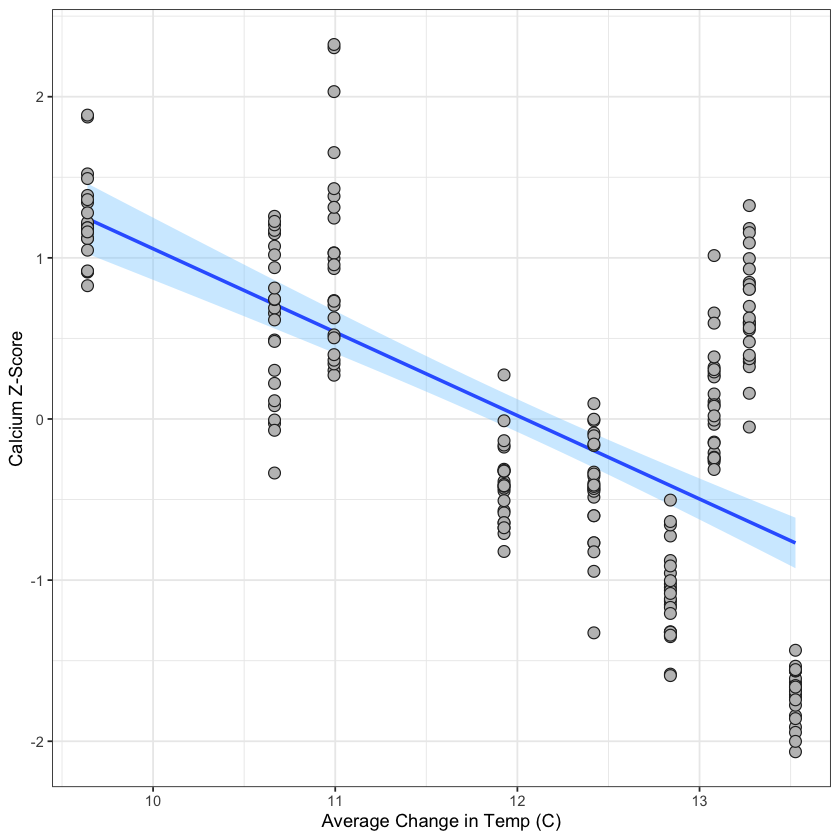

In [44]:
x_ni <- x %>% select(Ca, Mn, Mg, avgavgT, block)

p1 <- ggplot(x_ni, aes(x=avgavgT, y=scale(Ca))) +  
  stat_smooth(method='lm', fill='skyblue1') + 
  geom_point(size=3, shape=21, color='grey15', fill='grey75') +
  ylab("Calcium Z-Score") + 
  xlab("Average Daily Temp (C)") +
  theme_bw()
p2 <- ggplot(x_ni, aes(x=avgavgT, y=scale(Mn))) +  
  stat_smooth(method='lm', fill='skyblue1') + 
  geom_point(size=3, shape=21, color='grey15', fill='grey75') +
  ylab("Manganese Z-Score") + 
  xlab("Average Daily Temp (C)") +
  theme_bw()
p3 <- ggplot(x_ni, aes(x=avgavgT, y=scale(Mg))) +  
  stat_smooth(method='lm', fill='skyblue1') + 
  geom_point(size=3, shape=21, color='grey15', fill='grey75') +
  ylab("Magnesium Z-Score") + 
  xlab("Average Daily Temp (C)") +
  theme_bw()

pdf('1719_ionomics_seasonalMarkers_vineid.pdf', height=4, width=12)
  ggpubr::ggarrange(p1, p2, p3, ncol=3)
dev.off()

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


pdf 
  2

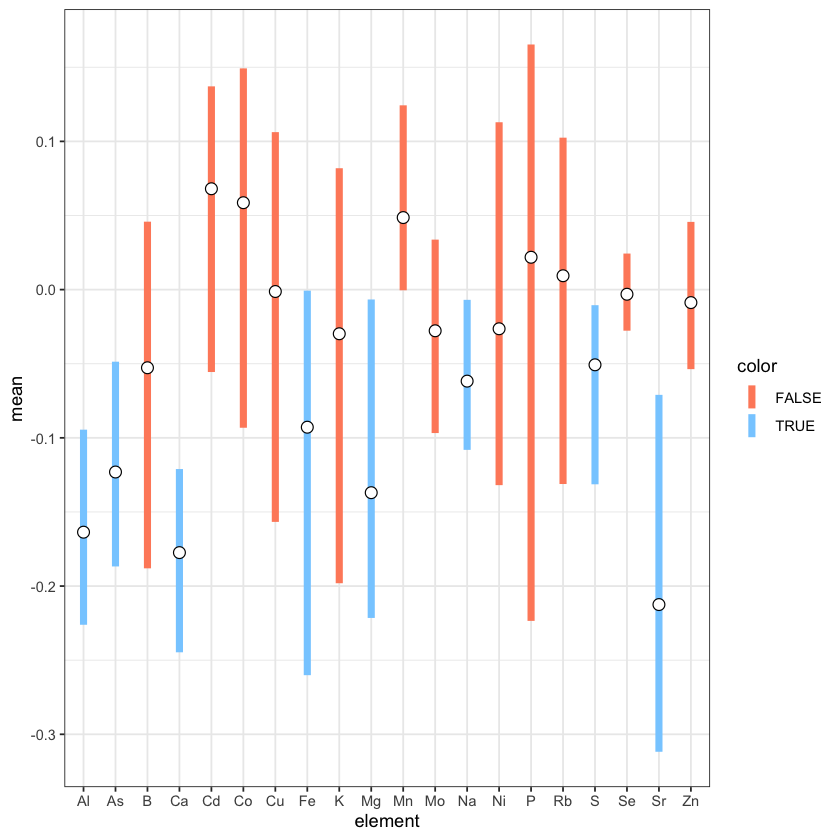

In [62]:
bootstrap_model <- function(ion, term, bs, df){
    d <- data.frame(ion=ion, term=df[,term])
    betas <- c()
    for (b in 1:bs){
        d_sub <- d %>% sample_n(dim(d)[1], replace=T)
        lmod <- lm(ion ~ term, data=d_sub)
        betas <- c(betas, lmod$coefficients[2])
    }
    return(betas)
}

out <- apply(X=select(x, B:Cd), FUN=bootstrap_model, MARGIN=2, term='avgdT_15', bs=1000, df=x)
out <- as.data.frame(out)
out$bs <- paste('bs', 1:100, sep='_')

alphas <- c(0.05/20/2, 1-(0.05/20/2))

out <- out %>%
  gather(element, beta, -bs) %>%
  group_by(element) %>%
  summarize(mean=mean(beta),
            lq = quantile(beta, probs=alphas[1])[[1]],
            uq = quantile(beta, probs=alphas[2])[[1]])

out$color <- ifelse(0 < out$lq | 0 > out$uq, TRUE, FALSE)


ggplot(out, aes(x=element, y=mean, ymin=lq, ymax=uq)) + 
  geom_linerange(aes(color=color), lwd=2) +
  scale_color_manual(values=c('salmon1', 'skyblue1')) + 
  geom_point(size=3, shape=21, fill='white') + 
  theme_bw()

`geom_smooth()` using formula 'y ~ x'


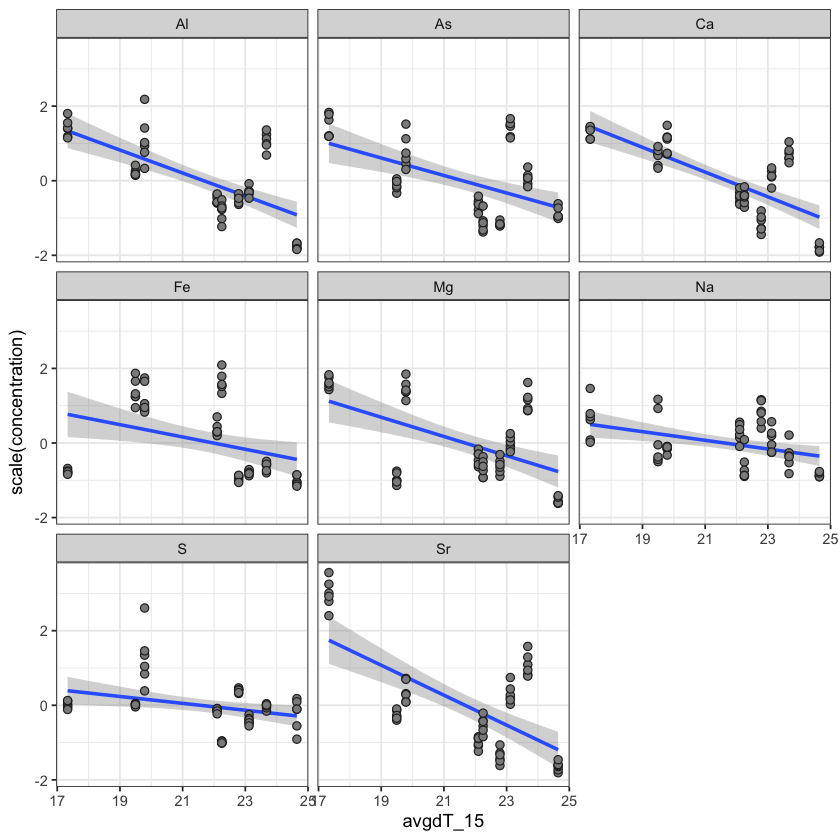

In [63]:
x_plot <- x %>% 
  select(B:Cd, avgdT_15, block) %>% 
  gather(element, concentration, -avgdT_15, -block)

#x_plot <- x_plot[x_plot$element %in% c('Al', 'As', 'Ca', 'Fe', 'Mg', 'Na', 'Rb', 'S', 'Sr') ,] #evap
#x_plot <- x_plot[x_plot$element %in% c('B', 'Cd', 'Cu', 'Mg', 'Mo', 'P', 'Rb', 'Sr') ,] #avgavgT_15
x_plot <- x_plot[x_plot$element %in% c('Al', 'As', 'Ca', 'Fe', 'Mg', 'Na', 'S', 'Sr') ,] #avgdT_15

ggplot(x_plot, aes(x=avgdT_15, y=scale(concentration))) + 
  stat_smooth(method='lm') + 
  geom_point(shape=21, size=2, fill='grey55', color='grey15') + 
  facet_wrap('element') + 
  theme_bw()

In [ ]:
## Rootstock by Env

In [83]:
get_REML_rootstock <- function(d, meta){
    df <- data.frame(conc=d, leafpos=meta$leafpos)
    lmod <- lmer(conc ~ (1|leafpos), data=df)
    return(resid(lmod))
}

x <- apply(X=select(ec_df, B:Cd), FUN=get_REML_rootstock, MARGIN=2, meta=ec_df)
x <- as.data.frame(x)
x <- apply(X=x, MARGIN=2, FUN=scale)
x <- as.data.frame(x)
x$block <- ec_df$block
x$rootstock <- ec_df$rootstock

x$yrPheno <- ec_df$yrPheno
x <- merge(x, yrPheno2Date, by='yrPheno')

x <- x %>%
  group_by(Date, block, rootstock) %>%
  summarize_at(vars(B:Cd), ~ mean(.x))

x <- merge(x, new_meta, by='Date')
x <- merge(x, weather_df, by='Date')
head(x)

Date       block rootstock B         Na         Mg          Al         
1 2017-05-22 1     1103P     1.0599301 0.47208716 -0.15739856 -0.14098426
2 2017-05-22 1     3309C     1.4608916 0.42306652 -0.44934767 -0.08379348
3 2017-05-22 1     SO4       1.0290787 0.12603190 -0.35839280 -0.34710991
4 2017-05-22 1     Ungrafted 0.2450375 0.14978577  0.00219362 -0.28355126
5 2017-05-22 2     1103P     1.0714619 0.08258806 -0.19911468 -0.33954046
6 2017-05-22 2     3309C     1.1557962 0.45569316 -0.54403910 -0.43074898
  P         S           K          ... precip maxP  minP  avgDP maxDP minDP
1 1.4352259 -0.09731461 0.63150666 ... 0      30.15 29.88 49.7  57.6  41.2 
2 0.7046674  0.07785367 0.63794493 ... 0      30.15 29.88 49.7  57.6  41.2 
3 1.5328639 -0.11989713 0.80319661 ... 0      30.15 29.88 49.7  57.6  41.2 
4 0.7023447 -0.04906786 0.07237146 ... 0      30.15 29.88 49.7  57.6  41.2 
5 1.2098859 -0.16111892 0.50724612 ... 0      30.15 29.88 49.7  57.6  41.2 
6 0.5605305  0.03474556 0.62580452 ... 0      30.15 29.88 49.7  57.6  41.2 
  evap  csrad totalRad MonthDay  
1 0.173 29.75 23.04    1904-05-22
2 0.173 29.75 23.04    1904-05-22
3 0.173 29.75 23.04    1904-05-22
4 0.173 29.75 23.04    1904-05-22
5 0.173 29.75 23.04    1904-05-22
6 0.173 29.75 23.04    1904-05-22

In [119]:
rs_palette <- c("gray", "#1b9e77", "#7570b3", "#e6ab02")
x$rootstock <- factor(x$rootstock, levels=c('Ungrafted', '1103P', '3309C', 'SO4'))

`geom_smooth()` using formula 'y ~ x'


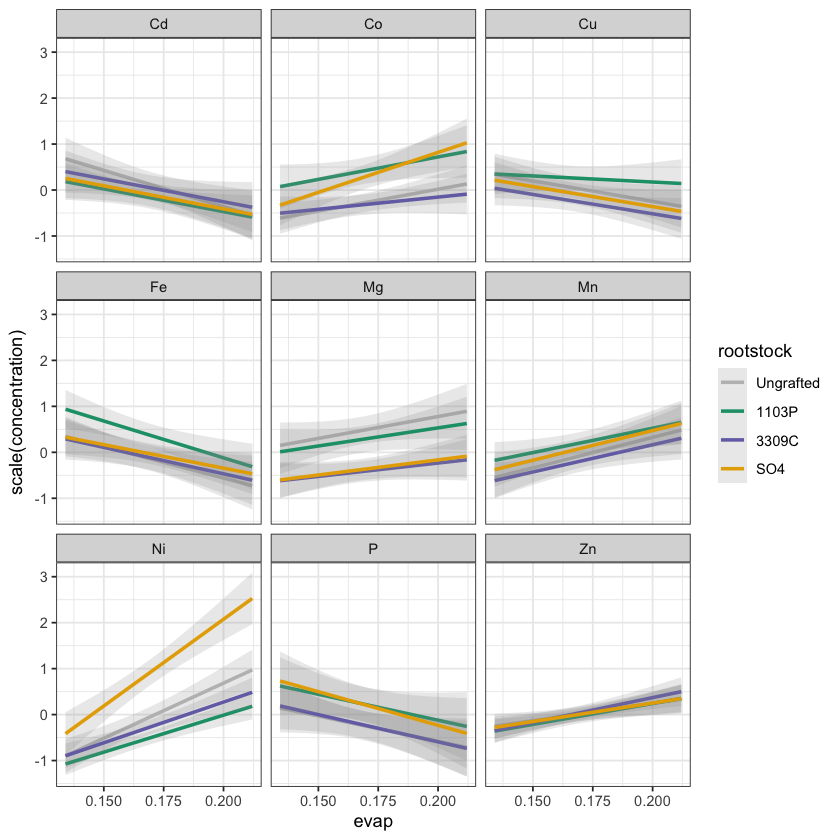

In [120]:
x_plot <- x %>% 
  select(B:Cd, block, evap, rootstock) %>% 
  gather(element, concentration, -evap, -block, -rootstock)

x_plot <- x_plot[x_plot$element %in% c('Cd', 'Co', 'Cu', 'Fe', 'Mg', 'Mn', 'Ni', 'P', 'Zn') ,]
#x_plot <- x_plot[x_plot$element %in% c('B', 'Cd', 'Cu', 'Mg', 'Mo', 'P', 'Rb', 'Sr') ,]
#x_plot <- x_plot[x_plot$element %in% c('Al', 'As', 'Ca', 'Fe', 'Mg', 'Na', 'S', 'Sr') ,] #avgdT_15

ggplot(x_plot, aes(x=evap, y=scale(concentration), group=rootstock, color=rootstock)) + 
  stat_smooth(method='lm', alpha=0.2) + 
  scale_color_manual(values=rs_palette) + 
  #geom_point(shape=21, size=2, fill='grey55', color='grey15') + 
  facet_wrap('element') + 
  theme_bw()

In [286]:
colnames(x)

[1] "Date"         "block"        "rootstock"    "B"            "Na"          
 [6] "Mg"           "Al"           "P"            "S"            "K"           
[11] "Ca"           "Fe"           "Mn"           "Co"           "Ni"          
[16] "Cu"           "Zn"           "As"           "Se"           "Rb"          
[21] "Sr"           "Mo"           "Cd"           "avgmaxT_60"   "avgavgT_60"  
[26] "avgW_60"      "avgP_60"      "sumPrecip_60" "sumRad_60"    "avgdT_60"    
[31] "avgmaxT_45"   "avgavgT_45"   "avgW_45"      "avgP_45"      "sumPrecip_45"
[36] "sumRad_45"    "avgdT_45"     "avgmaxT_30"   "avgavgT_30"   "avgW_30"     
[41] "avgP_30"      "sumPrecip_30" "sumRad_30"    "avgdT_30"     "avgmaxT_15"  
[46] "avgavgT_15"   "avgW_15"      "avgP_15"      "sumPrecip_15" "sumRad_15"   
[51] "avgdT_15"     "MONTH"        "DAY"          "YEAR"         "maxT"        
[56] "minT"         "avgT"         "maxWind"      "precip"       "maxP"        
[61] "minP"         "avgDP"        "maxDP"        "minDP"        "evap"        
[66] "csrad"        "totalRad"     "MonthDay"

`geom_smooth()` using formula 'y ~ x'


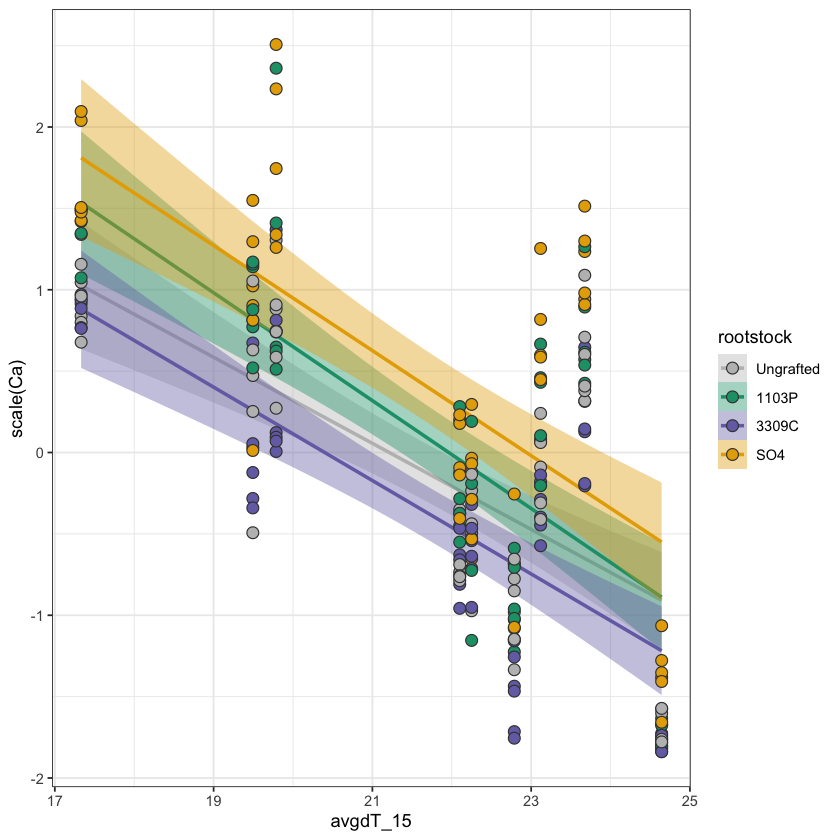

In [290]:
x_ni <- x %>% select(Ca, avgdT_15, rootstock, block)
x_ni$rootstock <- factor(x_ni$rootstock, levels=c('Ungrafted', '1103P', '3309C', 'SO4'))

ggplot(x_ni, aes(x=avgdT_15, y=scale(Ca), fill=rootstock)) + 
  geom_smooth(aes(color=rootstock), method='lm') + 
  scale_color_manual(values=rs_palette) + 
  geom_point(size=3, shape=21, color='grey25') + 
  scale_fill_manual(values=rs_palette) + 
  theme_bw()

In [134]:
bootstrap_model_rootstock <- function(ion, term, bs, df){
    d <- data.frame(ion=df[, ion], term=df[,term], rootstock=df[,'rootstock'])
    betas <- list(rsUngrafted=c(), rs1103P=c(), rs3309C=c(), rsSO4=c())
    for (b in 1:bs){
        for (rs in c('Ungrafted', '1103P', '3309C', 'SO4')){
            d_sub <- d %>% filter(rootstock == rs)
            d_sub <- d_sub %>% sample_n(dim(d_sub)[1], replace=T)
            lmod <- lm(ion ~ term, data=d_sub)
            betas[[str_interp("rs${rs}")]] <- c(betas[[str_interp("rs${rs}")]], lmod$coefficients[2])
        }
    }
    return(betas)
}

In [170]:
tt <- bootstrap_model_rootstock('Ni', 'evap', 1000, x)

 contrast          estimate    SE   df t.ratio  p.value
 Ungrafted - 1103P    4.741 0.115 3996   41.112 <.0001 
 Ungrafted - 3309C    3.776 0.115 3996   32.740 <.0001 
 Ungrafted - SO4     -8.518 0.115 3996  -73.862 <.0001 
 1103P - 3309C       -0.966 0.115 3996   -8.373 <.0001 
 1103P - SO4        -13.260 0.115 3996 -114.974 <.0001 
 3309C - SO4        -12.294 0.115 3996 -106.601 <.0001 

P value adjustment: tukey method for comparing a family of 4 estimates 

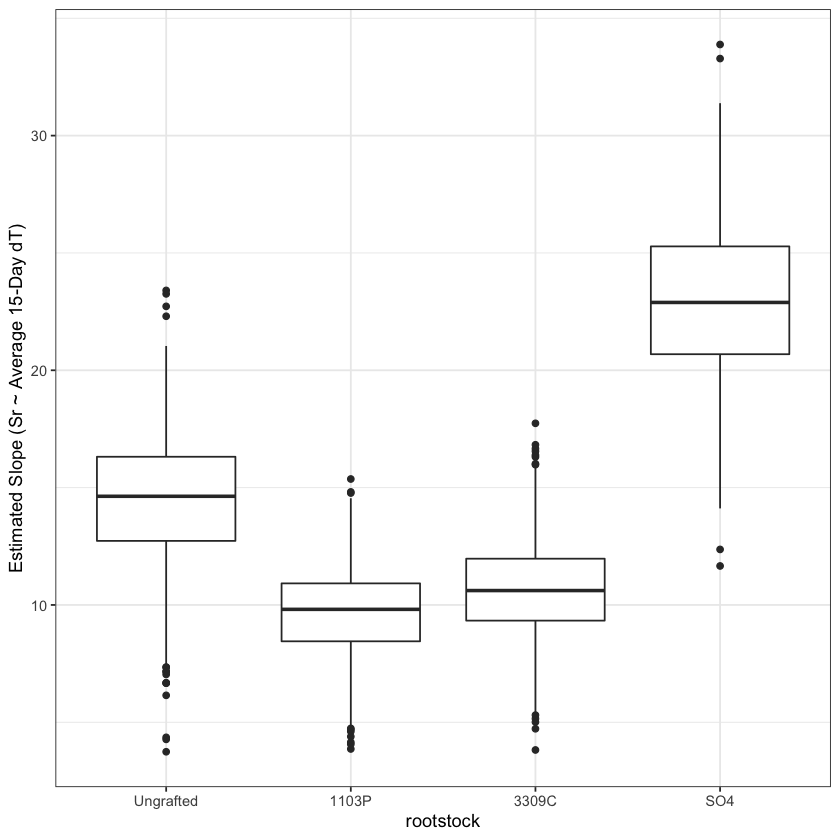

In [171]:
tt <- as.data.frame(tt)
tt <- tt %>% gather(rootstock, beta)
tt$rootstock <- factor(tt$rootstock, 
                       levels=c('rsUngrafted', 'rs1103P', 'rs3309C', 'rsSO4'), 
                       labels=c('Ungrafted', '1103P', '3309C', 'SO4'))

lmod <- lm(beta~rootstock, tt)
pairs(emmeans::emmeans(lmod, ~rootstock))

ggplot(tt, aes(x=rootstock, y=beta)) + 
  geom_boxplot() + 
  ylab("Estimated Slope (Ni ~ evap)") + 
  theme_bw()

In [175]:
lmod <- lm(Rb~sumPrecip_15*rootstock, x)
car::Anova(lmod, type=3)
pairs(emmeans::emtrends(lmod, var='sumPrecip_15'))

Sum Sq     Df  F value    Pr(>F)      
(Intercept)             6.5594906   1 36.5944113 6.667984e-09
sumPrecip_15            3.8488855   1 21.4723534 6.328483e-06
rootstock               2.3077228   3  4.2914794 5.794329e-03
sumPrecip_15:rootstock  0.1366113   3  0.2540446 8.583983e-01
Residuals              37.2836724 208         NA           NA

 contrast                                            estimate     SE  df
 1.94222222222222,Ungrafted - 1.94222222222222,1103P  0.01870 0.0457 208
 1.94222222222222,Ungrafted - 1.94222222222222,3309C -0.02114 0.0457 208
 1.94222222222222,Ungrafted - 1.94222222222222,SO4   -0.00213 0.0457 208
 1.94222222222222,1103P - 1.94222222222222,3309C     -0.03984 0.0457 208
 1.94222222222222,1103P - 1.94222222222222,SO4       -0.02083 0.0457 208
 1.94222222222222,3309C - 1.94222222222222,SO4        0.01901 0.0457 208
 t.ratio p.value
  0.409  0.9768 
 -0.463  0.9671 
 -0.047  1.0000 
 -0.872  0.8195 
 -0.456  0.9684 
  0.416  0.9757 

P value adjustment: tukey method for comparing a family of 4 estimates 

In [147]:
head(x)
x_subUg <- x[x$rootstock == 'Ungrafted',]
x_sub1103P <- x[x$rootstock == '1103P',]
x_sub3309C <- x[x$rootstock == '3309C',]
x_subSO4 <- x[x$rootstock == 'SO4',]

lmod_Ug <- lm(Ni ~ evap, data=x_subUg)
lmod_1103P <- lm(Ni ~ evap, data=x_sub1103P)
lmod_3309C <- lm(Ni ~ evap, data=x_sub3309C)
lmod_SO4 <- lm(Ni ~ evap, data=x_subSO4)

performance::r2(lmod_Ug)
performance::r2(lmod_1103P)
performance::r2(lmod_3309C)
performance::r2(lmod_SO4)

Date       block rootstock B         Na         Mg          Al         
1 2017-05-22 1     1103P     1.0599301 0.47208716 -0.15739856 -0.14098426
2 2017-05-22 1     3309C     1.4608916 0.42306652 -0.44934767 -0.08379348
3 2017-05-22 1     SO4       1.0290787 0.12603190 -0.35839280 -0.34710991
4 2017-05-22 1     Ungrafted 0.2450375 0.14978577  0.00219362 -0.28355126
5 2017-05-22 2     1103P     1.0714619 0.08258806 -0.19911468 -0.33954046
6 2017-05-22 2     3309C     1.1557962 0.45569316 -0.54403910 -0.43074898
  P         S           K          ... precip maxP  minP  avgDP maxDP minDP
1 1.4352259 -0.09731461 0.63150666 ... 0      30.15 29.88 49.7  57.6  41.2 
2 0.7046674  0.07785367 0.63794493 ... 0      30.15 29.88 49.7  57.6  41.2 
3 1.5328639 -0.11989713 0.80319661 ... 0      30.15 29.88 49.7  57.6  41.2 
4 0.7023447 -0.04906786 0.07237146 ... 0      30.15 29.88 49.7  57.6  41.2 
5 1.2098859 -0.16111892 0.50724612 ... 0      30.15 29.88 49.7  57.6  41.2 
6 0.5605305  0.03474556 0.62580452 ... 0      30.15 29.88 49.7  57.6  41.2 
  evap  csrad totalRad MonthDay  
1 0.173 29.75 23.04    1904-05-22
2 0.173 29.75 23.04    1904-05-22
3 0.173 29.75 23.04    1904-05-22
4 0.173 29.75 23.04    1904-05-22
5 0.173 29.75 23.04    1904-05-22
6 0.173 29.75 23.04    1904-05-22

# R2 for Linear Regression

       R2: 0.373
  adj. R2: 0.360

# R2 for Linear Regression

       R2: 0.384
  adj. R2: 0.372

# R2 for Linear Regression

       R2: 0.377
  adj. R2: 0.365

# R2 for Linear Regression

       R2: 0.474
  adj. R2: 0.463

In [71]:
fit_model <- function(d, meta, term){
    df <- data.frame(element=d, term=meta[,term])
    lmod <- lm(element ~ term, data=df)
    lmod_aov <- car::Anova(lmod, type=2)
    return(lmod_aov$Pr[1])
}

p.adjust(apply(X=select(x, B:Cd), FUN=fit_model, MARGIN=2, meta=x, term='evap'), method='fdr')

B           Na           Mg           Al            P            S 
2.495430e-01 7.417298e-01 2.495430e-01 7.590016e-01 2.115887e-01 5.804053e-01 
           K           Ca           Fe           Mn           Co           Ni 
2.495430e-01 9.115444e-01 4.920873e-02 4.920873e-02 6.952288e-02 4.644128e-07 
          Cu           Zn           As           Se           Rb           Sr 
2.495430e-01 2.368639e-02 9.469802e-01 9.469802e-01 7.590016e-01 9.469802e-01 
          Mo           Cd 
9.115444e-01 7.475145e-02

In [80]:
digest::sha1(sort(sample(1:54, size=54, replace=TRUE)))

[1] "d06af60ad0e22afe7db8ae63bd1af4e066edb1e2"

In [87]:
hashes  <- c()
collisions <-  0
v <- 1:54
for (i in 1:10000){
    x <- sort(sample(v, size=54, replace=TRUE))
    h <- digest::sha1(x)
    if (h %in% hashes){
        collisions <- collisions + 1
    } else {
        hashes <- c(hashes, h)
    }
}

print(collisions)

[1] 0


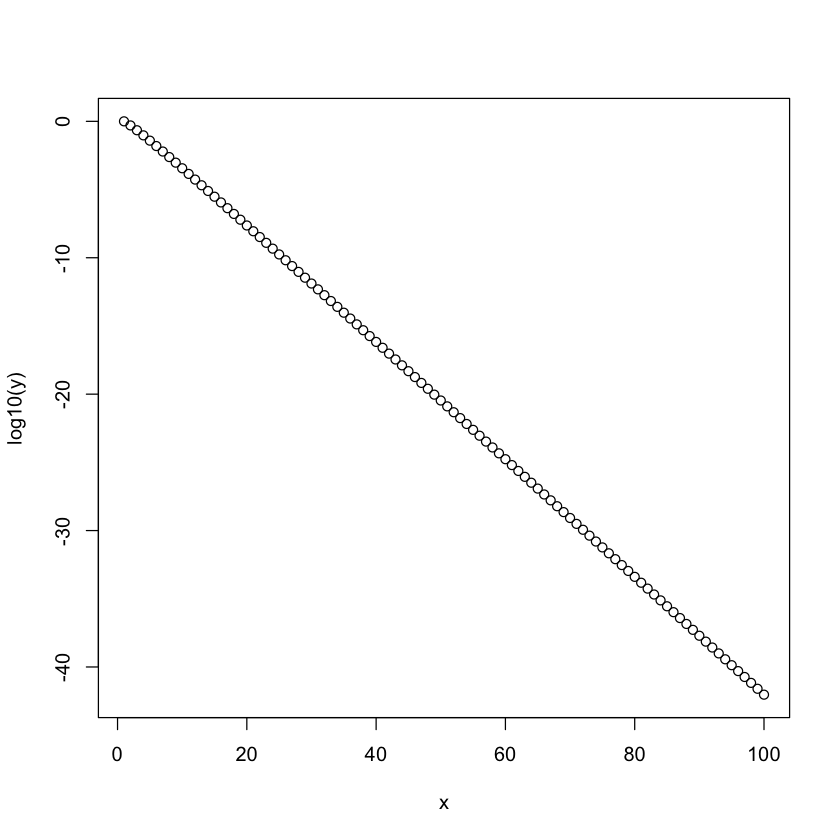

In [105]:
x <- 1:100
y <- factorial(x)/(x^x)
plot(x, log10(y))

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


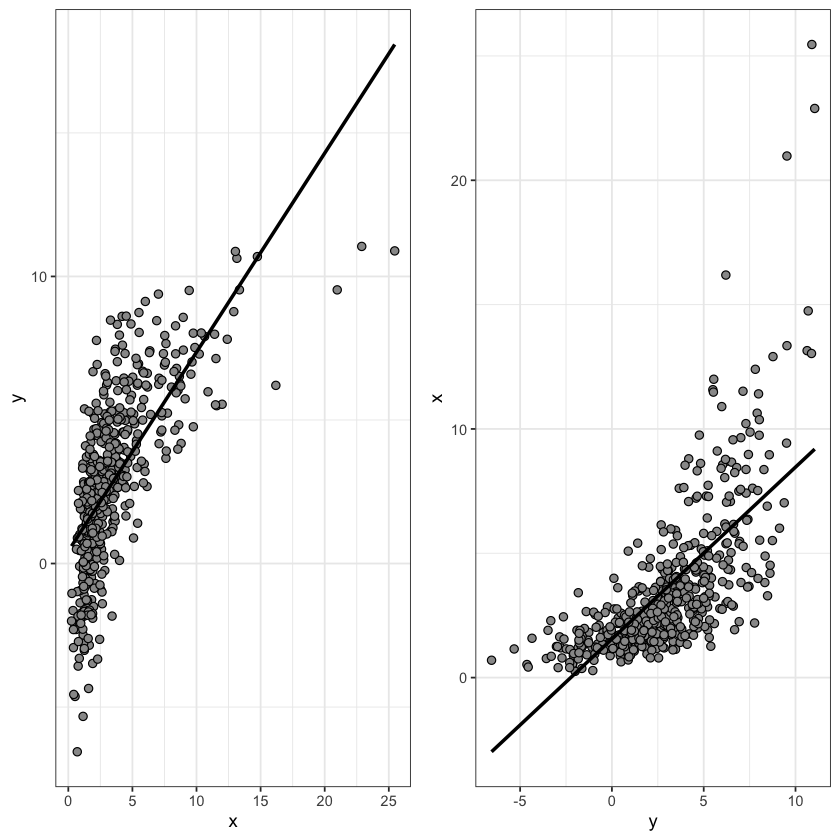

In [294]:
set.seed(1234)
x <- rlnorm(500, 1, 0.7)
y <- 3*log(x) + rnorm(500, 0, 2)
d <- data.frame(x=x, y=y)
#d <- d[d$x > 0,]

aa <- ggplot(d, aes(x=x, y=y)) + 
  geom_point(shape=21, fill='grey60', size=2) + 
  stat_smooth(method='lm', se=F, color='black') + 
  theme_bw()

bb <- ggplot(d, aes(x=y, y=x)) + 
  geom_point(shape=21, fill='grey60', size=2) + 
  stat_smooth(method='lm',  se=F, color='black') + 
  theme_bw()

ggpubr::ggarrange(aa, bb, nrow=1)